# Importar las librerías que vamos a utilizar y montar drive

In [2]:
# librerías para Manipular
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# librerías para Visualizar
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import kdeplot
from seaborn import distplot
from seaborn import boxplot

# librerías para Modelos
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# librerías para warnings 
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Obtener los datos del repositorio de drive 

In [6]:
# cargar los datos de los ficheros, train y test en un dataframe

df_train = pd.read_csv("/content/gdrive/MyDrive/Kaggle/houses_prices/train.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/Kaggle/houses_prices/test.csv")

In [7]:
# cargar los datos de sample_submission en un dataframe
# (tiene dos variables ID y SalesPrice)

df_y_test = pd.read_csv("/content/gdrive/MyDrive/Kaggle/houses_prices/sample_submission.csv")

In [8]:
# Comprobar la carga de los datos de los ficheros cargados

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [10]:
df_y_test.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

# Analisis exploratorio de los 3 dataframes: df_test, df_train e y_test

In [11]:
# Dimensiones (registros y variables)
# Train: 1 ID, 79 variables independientes y 1 variable dependiente (salesprice)
# Test: 1 ID, 79 variables independientes
# y_test: 1 ID y 1 variable dependiente (salesprice)

df_train.shape , df_test.shape, df_y_test.shape

((1460, 81), (1459, 80), (1459, 2))

In [12]:
# Primer analisis descriptivo de todas las variables de cada fichero. Aquí detectamos número de registros, 
# rango de los valores, cuartiles, ....

df_train.describe(include='all').T

count unique     top  freq          mean           std  \
Id             1460.0    NaN     NaN   NaN         730.5    421.610009   
MSSubClass     1460.0    NaN     NaN   NaN      56.89726     42.300571   
MSZoning         1460      5      RL  1151           NaN           NaN   
LotFrontage    1201.0    NaN     NaN   NaN     70.049958     24.284752   
LotArea        1460.0    NaN     NaN   NaN  10516.828082   9981.264932   
...               ...    ...     ...   ...           ...           ...   
MoSold         1460.0    NaN     NaN   NaN      6.321918      2.703626   
YrSold         1460.0    NaN     NaN   NaN   2007.815753      1.328095   
SaleType         1460      9      WD  1267           NaN           NaN   
SaleCondition    1460      6  Normal  1198           NaN           NaN   
SalePrice      1460.0    NaN     NaN   NaN  180921.19589  79442.502883   

                   min       25%       50%       75%       max  
Id                 1.0    365.75     730.5   1095.25    1460.0  
MSSubClass        20.0      20.0      50.0      70.0     190.0  
MSZoning           NaN       NaN       NaN       NaN       NaN  
LotFrontage       21.0      59.0      69.0      80.0     313.0  
LotArea         1300.0    7553.5    9478.5   11601.5  215245.0  
...                ...       ...       ...       ...       ...  
MoSold             1.0       5.0       6.0       8.0      12.0  
YrSold          2006.0    2007.0    2008.0    2009.0    2010.0  
SaleType           NaN       NaN       NaN       NaN       NaN  
SaleCondition      NaN       NaN       NaN       NaN       NaN  
SalePrice      34900.0  129975.0  163000.0  214000.0  755000.0  

[81 rows x 11 columns]

In [13]:
df_test.describe(include='all').T

count unique     top  freq         mean          std     min  \
Id             1459.0    NaN     NaN   NaN       2190.0   421.321334  1461.0   
MSSubClass     1459.0    NaN     NaN   NaN    57.378341     42.74688    20.0   
MSZoning         1455      5      RL  1114          NaN          NaN     NaN   
LotFrontage    1232.0    NaN     NaN   NaN    68.580357    22.376841    21.0   
LotArea        1459.0    NaN     NaN   NaN  9819.161069  4955.517327  1470.0   
...               ...    ...     ...   ...          ...          ...     ...   
MiscVal        1459.0    NaN     NaN   NaN    58.167923   630.806978     0.0   
MoSold         1459.0    NaN     NaN   NaN     6.104181     2.722432     1.0   
YrSold         1459.0    NaN     NaN   NaN  2007.769705      1.30174  2006.0   
SaleType         1458      9      WD  1258          NaN          NaN     NaN   
SaleCondition    1459      6  Normal  1204          NaN          NaN     NaN   

                  25%     50%      75%      max  
Id             1825.5  2190.0   2554.5   2919.0  
MSSubClass       20.0    50.0     70.0    190.0  
MSZoning          NaN     NaN      NaN      NaN  
LotFrontage      58.0    67.0     80.0    200.0  
LotArea        7391.0  9399.0  11517.5  56600.0  
...               ...     ...      ...      ...  
MiscVal           0.0     0.0      0.0  17000.0  
MoSold            4.0     6.0      8.0     12.0  
YrSold         2007.0  2008.0   2009.0   2010.0  
SaleType          NaN     NaN      NaN      NaN  
SaleCondition     NaN     NaN      NaN      NaN  

[80 rows x 11 columns]

In [14]:
df_y_test.describe(include='all').T

count           mean           std            min            25%  \
Id         1459.0    2190.000000    421.321334    1461.000000    1825.500000   
SalePrice  1459.0  179183.918243  16518.303051  135751.318893  168703.011202   

                     50%            75%            max  
Id           2190.000000    2554.500000    2919.000000  
SalePrice  179208.665698  186789.409363  281643.976117

# Comparación de variable dependiente **SalesPrice** en test y train, para ver si tiene la misma distribución, media, ...

In [16]:
#  Análisis descriptivo de la variable salesprice del fichero test

df_y_test['SalePrice'].describe()

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64

In [17]:
# Mediana variable salesprice del fichero test 
# La mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor.)

np.median(df_y_test['SalePrice'])

179208.665698449

In [18]:
#  Análisis descriptivo de la variable salesprice del fichero train

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [19]:
# Mediana variable salesprice del fichero train
np.median(df_train['SalePrice'])

163000.0

# Limpieza de datos

Quitamos las variables dependientes (salesprice) y los ID en **train**, y el ID de **test**, de tal forma que nos quedamos solo con las independientes. 

In [20]:
# Dejamos X_train y X_test con las variables independientes, y posteriormente los depuramos

X_train = df_train.drop(axis=1, columns=["SalePrice", "Id"])
X_test = df_test.drop(axis=1, columns=["Id"])


In [21]:
# Check de que solo tienen las variables independientes

X_train.describe(include='all').T

count unique     top  freq          mean          std     min  \
MSSubClass     1460.0    NaN     NaN   NaN      56.89726    42.300571    20.0   
MSZoning         1460      5      RL  1151           NaN          NaN     NaN   
LotFrontage    1201.0    NaN     NaN   NaN     70.049958    24.284752    21.0   
LotArea        1460.0    NaN     NaN   NaN  10516.828082  9981.264932  1300.0   
Street           1460      2    Pave  1454           NaN          NaN     NaN   
...               ...    ...     ...   ...           ...          ...     ...   
MiscVal        1460.0    NaN     NaN   NaN     43.489041   496.123024     0.0   
MoSold         1460.0    NaN     NaN   NaN      6.321918     2.703626     1.0   
YrSold         1460.0    NaN     NaN   NaN   2007.815753     1.328095  2006.0   
SaleType         1460      9      WD  1267           NaN          NaN     NaN   
SaleCondition    1460      6  Normal  1198           NaN          NaN     NaN   

                  25%     50%      75%       max  
MSSubClass       20.0    50.0     70.0     190.0  
MSZoning          NaN     NaN      NaN       NaN  
LotFrontage      59.0    69.0     80.0     313.0  
LotArea        7553.5  9478.5  11601.5  215245.0  
Street            NaN     NaN      NaN       NaN  
...               ...     ...      ...       ...  
MiscVal           0.0     0.0      0.0   15500.0  
MoSold            5.0     6.0      8.0      12.0  
YrSold         2007.0  2008.0   2009.0    2010.0  
SaleType          NaN     NaN      NaN       NaN  
SaleCondition     NaN     NaN      NaN       NaN  

[79 rows x 11 columns]

In [23]:
# Primer análisis de las variables independientes. Tenemos 1460 registros, por lo que deberíamos de tener de
# todas las variables 1460 valores. Tipo de variables (Enteros, flotantes y objetos)
# El número de valores nulos por cada variable es 1460 menos los no nulos)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
# Primer análisis de las variables independientes. Tenemos 1459 registros, por lo que deberíamos de tener de
# todas las variables 1459 valores. Tipo de variables (Enteros, flotantes y objetos)
# El número de valores nulos por cada variable es 1459 menos los no nulos)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Tratamiento de Missing values

In [25]:
# unimos test y train para conocer el número de datos missing (1460 registros train + 1459 test)

X_total=pd.concat([X_train, X_test], axis=0)

In [26]:
# sacamos un df con los null de total (total_null), train (train_null) y test (test_null)

#Total
total_null=pd.DataFrame({'Type': X_total.dtypes,
                  'Missing': X_total.isna().sum(),
                  'Size':X_total.shape[0],
                  'Unique': X_total.nunique()})
total_null['Missing_%']= (total_null.Missing/total_null.Size)*100
total_null=total_null.sort_values(by='Missing_%',ascending=False)
total_null.reset_index(inplace=True)


#Train
train_null=pd.DataFrame({'Type': X_train.dtypes,
                  'Missing': X_train.isna().sum(),
                  'Size':X_train.shape[0],
                  'Unique': X_train.nunique()})
train_null['Missing_%']= (train_null.Missing/train_null.Size)*100
train_null=train_null.sort_values(by='Missing_%',ascending=False)
train_null.reset_index(inplace=True)

#Test
test_null=pd.DataFrame({'Type': X_test.dtypes,
                  'Missing': X_test.isna().sum(),
                  'Size':X_test.shape[0],
                  'Unique': X_test.nunique()})
test_null['Missing_%']= (test_null.Missing/test_null.Size)*100
test_null=test_null.sort_values(by='Missing_%',ascending=False)
test_null.reset_index(inplace=True)



In [37]:
# Visualizar el total_null, train_null y test_null para ver el número de variables que tenemos con null
# La visualización está ordenada por de mayor a menor, con las variables que tienen null
# total_null --> 34 / train_null -> 19 / test_null -> 33

# Como podemos ver, en train tenemos 19 variables con valores nulos y en test tenemos 33 variables.
# Al tener en total 34 variables, indica que tenemos variables comunes en test y train con valores nulos.

total_null.head(35)
# train_null.head(35)
# test_null.head(35) 


index     Type  Missing  Size  Unique  Missing_%
0         PoolQC   object     2909  2919       3  99.657417
1    MiscFeature   object     2814  2919       4  96.402878
2          Alley   object     2721  2919       2  93.216855
3          Fence   object     2348  2919       4  80.438506
4    FireplaceQu   object     1420  2919       5  48.646797
5    LotFrontage  float64      486  2919     128  16.649538
6    GarageYrBlt  float64      159  2919     103   5.447071
7   GarageFinish   object      159  2919       3   5.447071
8     GarageQual   object      159  2919       5   5.447071
9     GarageCond   object      159  2919       5   5.447071
10    GarageType   object      157  2919       6   5.378554
11  BsmtExposure   object       82  2919       4   2.809181
12      BsmtCond   object       82  2919       4   2.809181
13      BsmtQual   object       81  2919       4   2.774923
14  BsmtFinType2   object       80  2919       6   2.740665
15  BsmtFinType1   object       79  2919       6   2.706406
16    MasVnrType   object       24  2919       4   0.822199
17    MasVnrArea  float64       23  2919     444   0.787941
18      MSZoning   object        4  2919       5   0.137033
19    Functional   object        2  2919       7   0.068517
20  BsmtHalfBath  float64        2  2919       3   0.068517
21  BsmtFullBath  float64        2  2919       4   0.068517
22     Utilities   object        2  2919       2   0.068517
23      SaleType   object        1  2919       9   0.034258
24    BsmtFinSF1  float64        1  2919     991   0.034258
25   KitchenQual   object        1  2919       4   0.034258
26    GarageCars  float64        1  2919       6   0.034258
27     BsmtUnfSF  float64        1  2919    1135   0.034258
28   TotalBsmtSF  float64        1  2919    1058   0.034258
29   Exterior2nd   object        1  2919      16   0.034258
30   Exterior1st   object        1  2919      15   0.034258
31    GarageArea  float64        1  2919     603   0.034258
32    Electrical   object        1  2919       5   0.034258
33    BsmtFinSF2  float64        1  2919     272   0.034258
34  TotRmsAbvGrd    int64        0  2919      14   0.000000

Una vez ejecutado el paso anterior (crear un arrray con las variables que tienen valores missing)


In [38]:
# Creación de un array con las variables que tienen null en total, test y train

total_null_array=np.array(total_null.iloc[:34]['index'])
test_null_array=np.array(test_null.iloc[:33]['index'])
train_null_array=np.array(train_null.iloc[:19]['index'])


In [39]:
# Ver las dimensiones de los arrays creados

print("Dimensiones de total:", total_null_array.shape, 
      "\nDimensiones de train:", train_null_array.shape,
      "\nDimensiones de test:", test_null_array.shape)

Dimensiones de total: (34,) 
Dimensiones de train: (19,) 
Dimensiones de test: (33,)


Imprimimos el fichero **data_description**, donde nos viene la descripción de todas las variables, así como los posibles valores.

Atacamos los valores null, dividiendo los missing en las siguientes "bolsas"

> * **Numéricos**: Variables de tipo numérico. Asignamos la **mediana** al valor null. (Una vez terminado el modelo, podríamos cambiar la media por la media por si mejora el modelo.

> * **Object1**: Variables de tipo objeto, donde se puede asignar el valor null a un valor de las categorías (Ver archivo de las variables con los posibles valores).

> * **Object2**: Variable de tipo objeto, donde **NO** se puede asignar un valor de las categorías, por lo que  asignamos la **moda** (valor más frecuente) al valor null 



In [42]:
# Esta variable tendrá todas las variables analizadas
columns_features=X_train.columns

In [43]:
columns_features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

###  **Object1**: Variables de tipo objeto, donde se puede asignar el valor null a un valor de las categorías (Ver archivo de las variables con los posibles valores).



In [44]:
# Sacamos cuales son las variables de tipo objet

columns_object=X_train.select_dtypes(include='object').columns
columns_object

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
# Mostramos de todas las variables object con el número de valores para cada categoría en el fichero train


for i in columns_object:
    print(i)
    print(X_train[i].value_counts(),"\n************")

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 
************
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64 
************
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64 
************
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 
************
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 
************
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 
************
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 
************
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 
************
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge 

Con el fichero impreso de **data_description** vemos cada variable 

**PoolQC**: Calidad de la piscina. 99,65% Missing values. El alto % de valores missing, indica que no hay piscina. Posibles valores:
* Ex	Excellent
* Gd	Good
* TA	Average/Typical
* Fa	Fair
* **NA**	No Pool

-> Actualizamos estos valores con **NA**. Deberiamos actualizar la variable numérica **PoolArea** con el mismo criterio

**MiscFeature**: Característica miscelánea no cubierta en otras categorías. Posibles valores:
* Elev	Elevator
* Gar2	2nd Garage (if not described in garage section)
* Othr	Other
* Shed	Shed (over 100 SF)
* TenC	Tennis Court
* **NA**	None

-> Actualizamos estos valores con **NA**


**Alley**: Tipo de callejón de acceso a la propiedad. Posibles valores:
* Grvl	Gravel
* Pave	Paved
* **NA** 	No alley access

-> Actualizamos estos valores con **NA**


**Fence**: calidad de la cerca. Posibles valores:
* GdPrv	Good Privacy
* MnPrv	Minimum Privacy
* GdWo	Good Wood
* MnWw	Minimum Wood/Wire
* **NA**	No Fence

-> Actualizamos estos valores con **NA**


**FireplaceQC**:Calidad de chimenea. Posibles valores:
* Ex	Excellent - Exceptional Masonry Fireplace
* Gd	Good - Masonry Fireplace in main level
* TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
* Fa	Fair - Prefabricated Fireplace in basement
* Po	Poor - Ben Franklin Stove
* **NA**	No Fireplace

-> Actualizamos estos valores con **NA**

**GarageType**:Ubicación del garaje. Posibles valores:
* 2Types	More than one type of garage
* Attchd	Attached to home
* Basment	Basement Garage
* BuiltIn	Built-In (Garage part of house - typically has room above garage)
* CarPort	Car Port
* Detchd	Detached from home
* **NA**	No Garage

-> Actualizamos estos valores con **NA**


**GarageFinish**, **GarageQual**, **GarageCond** -> actualizamos estos valores con **NA**, en línea con el anterior.


**BsmtCond**:Evalúa el estado general del sótano. Posibles valores:
* Ex	Excellent
* Gd	Good
* TA	Typical - slight dampness allowed
* Fa	Fair - dampness or some cracking or settling
* Po	Poor - Severe cracking, settling, or wetness
* **NA**	No Basement

-> Suponemos que no tiene sotano. Caso parecido al de garaje. Actualizamos estos valores con **NA**

**BsmtExposure**, **BsmtFinType1**, **BsmtFinType2**, **BsmtQual**, -> actualizamos estos valores con **NA**, en línea con el anterior.

In [48]:
# Creamos una lista con las variables object donde sustituimos el valor null por el valor NA 

arr_null=['PoolQC', 'MiscFeature','Alley', 'Fence', 'FireplaceQu',
          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
          'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtQual']

In [49]:
# Cambiamos los valores

for i in arr_null:
    X_train[i].fillna('NA',inplace=True)
    X_test[i].fillna('NA',inplace=True)
    X_total[i].fillna('NA',inplace=True) 

In [50]:
# Comprobamos que variables faltan por arreglar los null en el arr_null

total_null_array=list(set(total_null_array).symmetric_difference(arr_null))
train_null_array=list(set(train_null_array).symmetric_difference(arr_null))
test_null_array=list(set(test_null_array).symmetric_difference(arr_null))

In [56]:
# En fichero train

train_null_array

['Electrical', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'MasVnrType']

In [55]:
# En fichero total

total_null_array

['Utilities',
 'BsmtHalfBath',
 'KitchenQual',
 'TotalBsmtSF',
 'Electrical',
 'Exterior1st',
 'BsmtFullBath',
 'SaleType',
 'Exterior2nd',
 'GarageCars',
 'GarageYrBlt',
 'MasVnrType',
 'BsmtFinSF2',
 'LotFrontage',
 'MasVnrArea',
 'MSZoning',
 'Functional',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea']

In [54]:
# En fichero test

test_null_array

['Utilities',
 'BsmtHalfBath',
 'KitchenQual',
 'TotalBsmtSF',
 'Exterior1st',
 'BsmtFullBath',
 'SaleType',
 'Exterior2nd',
 'GarageCars',
 'GarageYrBlt',
 'MasVnrType',
 'BsmtFinSF2',
 'LotFrontage',
 'MasVnrArea',
 'MSZoning',
 'Functional',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea']

In [57]:
# Volvemos a sacar un df de total, train y test con los null

#Total
total_null=pd.DataFrame({'Type': X_total.dtypes,
                  'Missing': X_total.isna().sum(),
                  'Size':X_total.shape[0],
                  'Unique': X_total.nunique()})
total_null['Missing_%']= (total_null.Missing/total_null.Size)*100
total_null=total_null.sort_values(by='Missing_%',ascending=False)
total_null.reset_index(inplace=True)


#Train
train_null=pd.DataFrame({'Type': X_train.dtypes,
                  'Missing': X_train.isna().sum(),
                  'Size':X_train.shape[0],
                  'Unique': X_train.nunique()})
train_null['Missing_%']= (train_null.Missing/train_null.Size)*100
train_null=train_null.sort_values(by='Missing_%',ascending=False)
train_null.reset_index(inplace=True)

#Test
test_null=pd.DataFrame({'Type': X_test.dtypes,
                  'Missing': X_test.isna().sum(),
                  'Size':X_test.shape[0],
                  'Unique': X_test.nunique()})
test_null['Missing_%']= (test_null.Missing/test_null.Size)*100
test_null=test_null.sort_values(by='Missing_%',ascending=False)
test_null.reset_index(inplace=True)

In [58]:
# Ver ahora los null en los tres df 

total_null.head(35) 

index     Type  Missing  Size  Unique  Missing_%
0    LotFrontage  float64      486  2919     128  16.649538
1    GarageYrBlt  float64      159  2919     103   5.447071
2     MasVnrType   object       24  2919       4   0.822199
3     MasVnrArea  float64       23  2919     444   0.787941
4       MSZoning   object        4  2919       5   0.137033
5   BsmtHalfBath  float64        2  2919       3   0.068517
6     Functional   object        2  2919       7   0.068517
7   BsmtFullBath  float64        2  2919       4   0.068517
8      Utilities   object        2  2919       2   0.068517
9    Exterior2nd   object        1  2919      16   0.034258
10   KitchenQual   object        1  2919       4   0.034258
11    BsmtFinSF1  float64        1  2919     991   0.034258
12    GarageArea  float64        1  2919     603   0.034258
13    BsmtFinSF2  float64        1  2919     272   0.034258
14     BsmtUnfSF  float64        1  2919    1135   0.034258
15   TotalBsmtSF  float64        1  2919    1058   0.034258
16    Electrical   object        1  2919       5   0.034258
17    GarageCars  float64        1  2919       6   0.034258
18   Exterior1st   object        1  2919      15   0.034258
19      SaleType   object        1  2919       9   0.034258
20    GarageQual   object        0  2919       6   0.000000
21    GarageCond   object        0  2919       6   0.000000
22      FullBath    int64        0  2919       5   0.000000
23      HalfBath    int64        0  2919       3   0.000000
24  BedroomAbvGr    int64        0  2919       8   0.000000
25        YrSold    int64        0  2919       5   0.000000
26  KitchenAbvGr    int64        0  2919       4   0.000000
27        MoSold    int64        0  2919      12   0.000000
28       MiscVal    int64        0  2919      38   0.000000
29   MiscFeature   object        0  2919       5   0.000000
30         Fence   object        0  2919       5   0.000000
31        PoolQC   object        0  2919       4   0.000000
32  TotRmsAbvGrd    int64        0  2919      14   0.000000
33      PoolArea    int64        0  2919      14   0.000000
34    Fireplaces    int64        0  2919       5   0.000000

In [59]:
train_null.head(35) 

index     Type  Missing  Size  Unique  Missing_%
0     LotFrontage  float64      259  1460     110  17.739726
1     GarageYrBlt  float64       81  1460      97   5.547945
2      MasVnrType   object        8  1460       4   0.547945
3      MasVnrArea  float64        8  1460     327   0.547945
4      Electrical   object        1  1460       5   0.068493
5     KitchenQual   object        0  1460       4   0.000000
6      GarageType   object        0  1460       7   0.000000
7     FireplaceQu   object        0  1460       6   0.000000
8      Fireplaces    int64        0  1460       4   0.000000
9      Functional   object        0  1460       7   0.000000
10   TotRmsAbvGrd    int64        0  1460      12   0.000000
11     MSSubClass    int64        0  1460      15   0.000000
12   KitchenAbvGr    int64        0  1460       4   0.000000
13       HalfBath    int64        0  1460       3   0.000000
14       FullBath    int64        0  1460       4   0.000000
15   BsmtHalfBath    int64        0  1460       3   0.000000
16   BsmtFullBath    int64        0  1460       4   0.000000
17      GrLivArea    int64        0  1460     861   0.000000
18   LowQualFinSF    int64        0  1460      24   0.000000
19       2ndFlrSF    int64        0  1460     417   0.000000
20   BedroomAbvGr    int64        0  1460       8   0.000000
21     GarageCars    int64        0  1460       5   0.000000
22   GarageFinish   object        0  1460       4   0.000000
23       PoolArea    int64        0  1460       8   0.000000
24       SaleType   object        0  1460       9   0.000000
25         YrSold    int64        0  1460       5   0.000000
26         MoSold    int64        0  1460      12   0.000000
27        MiscVal    int64        0  1460      21   0.000000
28    MiscFeature   object        0  1460       5   0.000000
29          Fence   object        0  1460       5   0.000000
30         PoolQC   object        0  1460       4   0.000000
31    ScreenPorch    int64        0  1460      76   0.000000
32     GarageArea    int64        0  1460     441   0.000000
33      3SsnPorch    int64        0  1460      20   0.000000
34  EnclosedPorch    int64        0  1460     120   0.000000

In [60]:
test_null.head(35) 

index     Type  Missing  Size  Unique  Missing_%
0    LotFrontage  float64      227  1459     115  15.558602
1    GarageYrBlt  float64       78  1459      97   5.346127
2     MasVnrType   object       16  1459       4   1.096642
3     MasVnrArea  float64       15  1459     303   1.028101
4       MSZoning   object        4  1459       5   0.274160
5   BsmtFullBath  float64        2  1459       4   0.137080
6     Functional   object        2  1459       7   0.137080
7      Utilities   object        2  1459       1   0.137080
8   BsmtHalfBath  float64        2  1459       3   0.137080
9     GarageArea  float64        1  1459     459   0.068540
10   KitchenQual   object        1  1459       4   0.068540
11    BsmtFinSF1  float64        1  1459     669   0.068540
12    BsmtFinSF2  float64        1  1459     161   0.068540
13     BsmtUnfSF  float64        1  1459     793   0.068540
14   TotalBsmtSF  float64        1  1459     736   0.068540
15   Exterior2nd   object        1  1459      15   0.068540
16    GarageCars  float64        1  1459       6   0.068540
17   Exterior1st   object        1  1459      13   0.068540
18      SaleType   object        1  1459       9   0.068540
19    GarageCond   object        0  1459       6   0.000000
20  TotRmsAbvGrd    int64        0  1459      12   0.000000
21      FullBath    int64        0  1459       5   0.000000
22      HalfBath    int64        0  1459       3   0.000000
23  BedroomAbvGr    int64        0  1459       7   0.000000
24        YrSold    int64        0  1459       5   0.000000
25  KitchenAbvGr    int64        0  1459       3   0.000000
26        MoSold    int64        0  1459      12   0.000000
27       MiscVal    int64        0  1459      26   0.000000
28   MiscFeature   object        0  1459       4   0.000000
29         Fence   object        0  1459       5   0.000000
30        PoolQC   object        0  1459       3   0.000000
31      PoolArea    int64        0  1459       7   0.000000
32    GarageQual   object        0  1459       5   0.000000
33    Fireplaces    int64        0  1459       5   0.000000
34   FireplaceQu   object        0  1459       6   0.000000

###  Numéricos y Object2
> * **Numéricos**: Asignamos la mediana al valor null


> * **Object2**: No se puede asignar un valor de las categorías, por lo que  asignamos la moda al valor null

In [61]:
columns_numbers1=X_train.select_dtypes(include='float64').columns

In [62]:
columns_numbers1
# los flotantes

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [63]:
columns_numbers2=X_train.select_dtypes(include='int64').columns

In [71]:
columns_numbers2
# Los enteros. Aqui tenemos variables, que apesar de ser enteros, son categorías(MSSubClass, OverallQual, OverallCond)
# A estas variables les daremos el valor más frecuente, la Moda. Aunque revisando train_null_array, test_null_array 
# y total_null_array no aparecen estas variables

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [72]:
train_null_array

['Electrical', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'MasVnrType']

In [73]:
test_null_array

['Utilities',
 'BsmtHalfBath',
 'KitchenQual',
 'TotalBsmtSF',
 'Exterior1st',
 'BsmtFullBath',
 'SaleType',
 'Exterior2nd',
 'GarageCars',
 'GarageYrBlt',
 'MasVnrType',
 'BsmtFinSF2',
 'LotFrontage',
 'MasVnrArea',
 'MSZoning',
 'Functional',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea']

In [74]:
total_null_array

['Utilities',
 'BsmtHalfBath',
 'KitchenQual',
 'TotalBsmtSF',
 'Electrical',
 'Exterior1st',
 'BsmtFullBath',
 'SaleType',
 'Exterior2nd',
 'GarageCars',
 'GarageYrBlt',
 'MasVnrType',
 'BsmtFinSF2',
 'LotFrontage',
 'MasVnrArea',
 'MSZoning',
 'Functional',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea']

In [75]:
# valores que damos a los nulos
# si es tipo object moda (el valor mas frecuente), y en caso contrario mediana

for i in train_null_array:
    if X_train[i].dtype == 'object':
        X_train[i].fillna(X_train[i].mode()[0],inplace=True)
    else:
        X_train[i].fillna(X_train[i].median(),inplace=True)


for i in test_null_array:
    if X_test[i].dtype == 'object':
        X_test[i].fillna(X_test[i].mode()[0],inplace=True)
    else:
        X_test[i].fillna(X_test[i].median(),inplace=True)


for i in total_null_array:
    if X_total[i].dtype == 'object':
        X_total[i].fillna(X_total[i].mode()[0],inplace=True)
    else:
        X_total[i].fillna(X_total[i].median(),inplace=True)


In [76]:
# Volvemos a sacar un df de total, train y test con los null

#Total
total_null=pd.DataFrame({'Type': X_total.dtypes,
                  'Missing': X_total.isna().sum(),
                  'Size':X_total.shape[0],
                  'Unique': X_total.nunique()})
total_null['Missing_%']= (total_null.Missing/total_null.Size)*100
total_null=total_null.sort_values(by='Missing_%',ascending=False)
total_null.reset_index(inplace=True)


#Train
train_null=pd.DataFrame({'Type': X_train.dtypes,
                  'Missing': X_train.isna().sum(),
                  'Size':X_train.shape[0],
                  'Unique': X_train.nunique()})
train_null['Missing_%']= (train_null.Missing/train_null.Size)*100
train_null=train_null.sort_values(by='Missing_%',ascending=False)
train_null.reset_index(inplace=True)

#Test
test_null=pd.DataFrame({'Type': X_test.dtypes,
                  'Missing': X_test.isna().sum(),
                  'Size':X_test.shape[0],
                  'Unique': X_test.nunique()})
test_null['Missing_%']= (test_null.Missing/test_null.Size)*100
test_null=test_null.sort_values(by='Missing_%',ascending=False)
test_null.reset_index(inplace=True)

In [80]:
# Ver ahora los null en los tres df 
total_null.head(10) 


index    Type  Missing  Size  Unique  Missing_%
0    MSSubClass   int64        0  2919      16        0.0
1  BedroomAbvGr   int64        0  2919       8        0.0
2    GarageType  object        0  2919       7        0.0
3   FireplaceQu  object        0  2919       6        0.0
4    Fireplaces   int64        0  2919       5        0.0
5    Functional  object        0  2919       7        0.0
6  TotRmsAbvGrd   int64        0  2919      14        0.0
7   KitchenQual  object        0  2919       4        0.0
8  KitchenAbvGr   int64        0  2919       4        0.0
9      HalfBath   int64        0  2919       3        0.0

In [81]:

train_null.head(10) 


index    Type  Missing  Size  Unique  Missing_%
0    MSSubClass   int64        0  1460      15        0.0
1  BedroomAbvGr   int64        0  1460       8        0.0
2    GarageType  object        0  1460       7        0.0
3   FireplaceQu  object        0  1460       6        0.0
4    Fireplaces   int64        0  1460       4        0.0
5    Functional  object        0  1460       7        0.0
6  TotRmsAbvGrd   int64        0  1460      12        0.0
7   KitchenQual  object        0  1460       4        0.0
8  KitchenAbvGr   int64        0  1460       4        0.0
9      HalfBath   int64        0  1460       3        0.0

In [82]:

test_null.head(10) 

index    Type  Missing  Size  Unique  Missing_%
0    MSSubClass   int64        0  1459      16        0.0
1  BedroomAbvGr   int64        0  1459       7        0.0
2    GarageType  object        0  1459       7        0.0
3   FireplaceQu  object        0  1459       6        0.0
4    Fireplaces   int64        0  1459       5        0.0
5    Functional  object        0  1459       7        0.0
6  TotRmsAbvGrd   int64        0  1459      12        0.0
7   KitchenQual  object        0  1459       4        0.0
8  KitchenAbvGr   int64        0  1459       3        0.0
9      HalfBath   int64        0  1459       3        0.0

Ya tenemos todo sin missing data

# Correlación con la variable SalesPrice


**Cuando sacamos la correlación de las variables con la variable SalesPrice, obtuvimos las variables que afectan el precio, por lo que debemos usar la selección de variables que predicen el precio**

Incorporo y a X_train --> xy_train

In [84]:
y_train = df_train['SalePrice']
xy_train = pd.concat([X_train, y_train ], axis=1)

In [85]:
cor_train=df_train.corr()


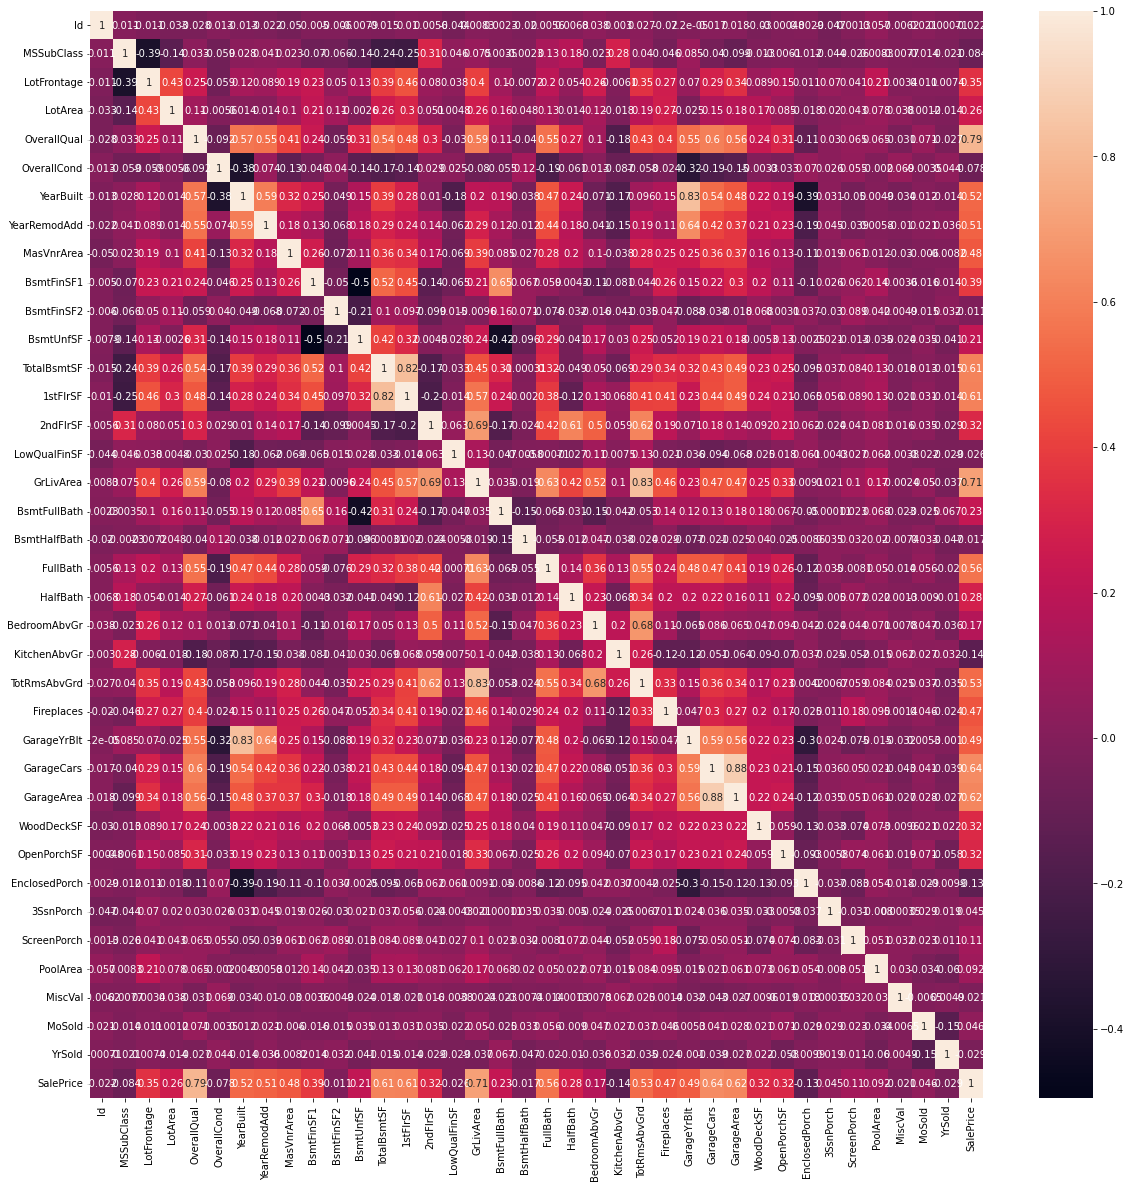

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_train,annot=True)

In [87]:
correlation=cor_train["SalePrice"].sort_values(ascending=False)
correlation=pd.DataFrame(correlation)

Variables que más afectan al precio ordenadas de mayor a menor



In [89]:
correlation.head(80)

SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Id             -0.021917
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907

In [90]:
X_train.shape, X_test.shape

((1460, 79), (1459, 79))

Vuelvo a hacer la tabla de correlación con las variables sin null en x e incorporando y "xy_train"

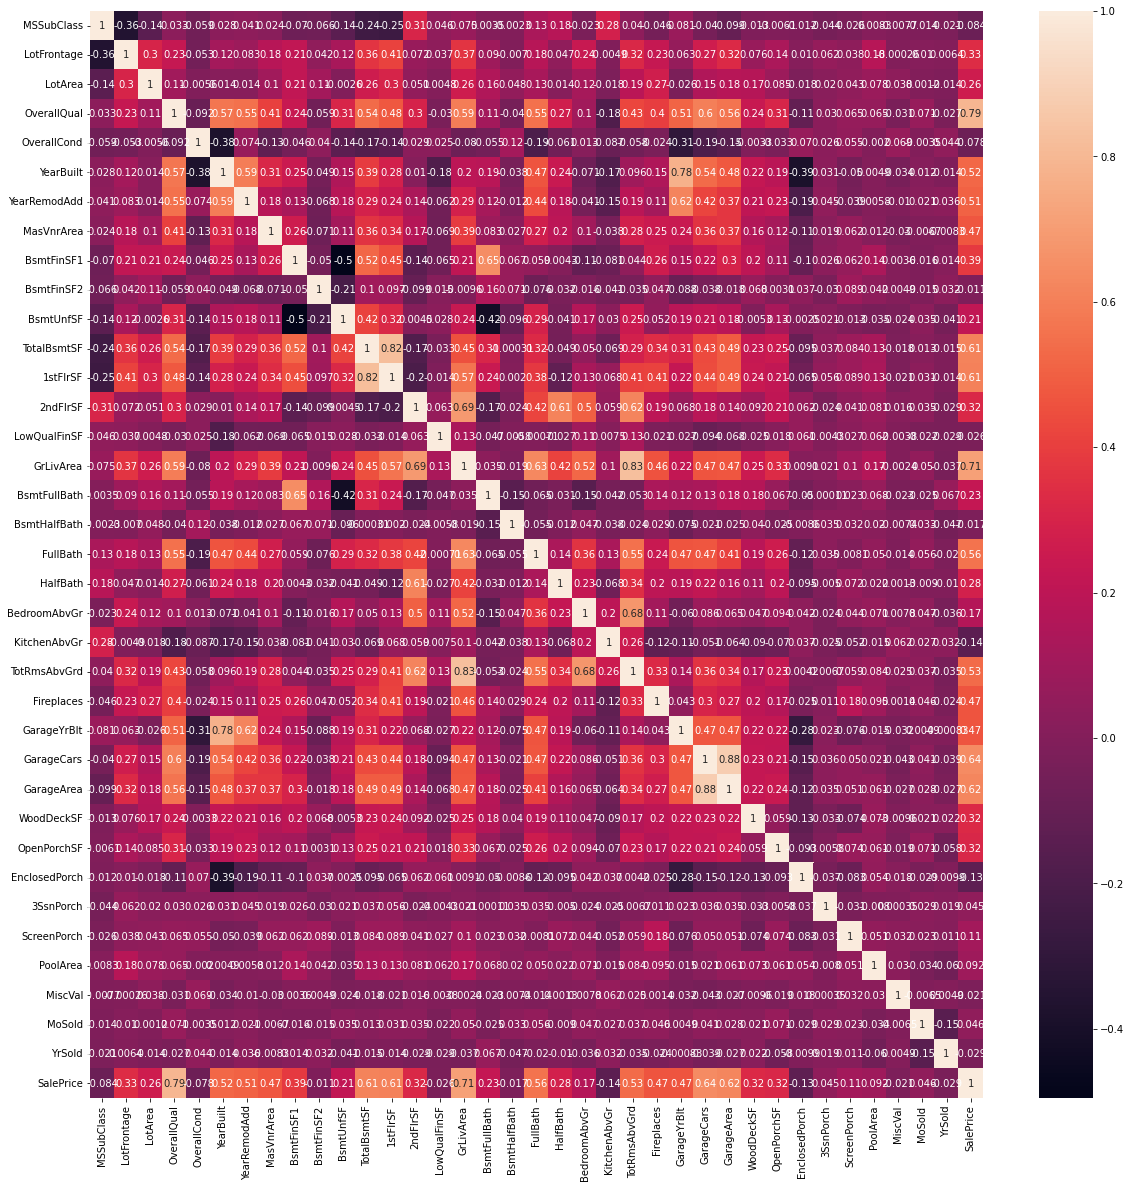

In [91]:
cor_train2=xy_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor_train2,annot=True)

In [92]:
correlation2=cor_train2["SalePrice"].sort_values(ascending=False)
correlation2=pd.DataFrame(correlation2)
correlation2.head(80)

SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907

In [93]:
print(correlation.head(11), "\n*******\n", correlation2.head(11))

              SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101 
*******
               SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101


No varian las variables que más correlación tienen con SalePrice 

# Analisis visual de las variables que más afectan al precio

In [96]:
columns_object

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [97]:
def bar_chart(col):
    HousePrice=xy_train.groupby([col])['SalePrice'].mean()
    df_HousePrice=pd.DataFrame(HousePrice).sort_values(by=['SalePrice'],ascending=False)
    df_HousePrice.reset_index(inplace=True)
    plt.bar(x=df_HousePrice[col],height=df_HousePrice['SalePrice'])
    plt.title(f'Media de SalePrice según valores de  {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

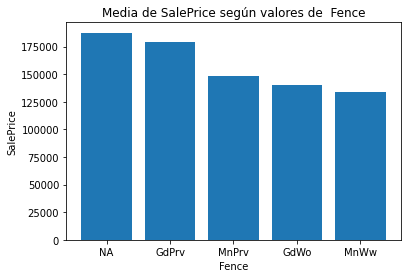

In [98]:
bar_chart('Fence')

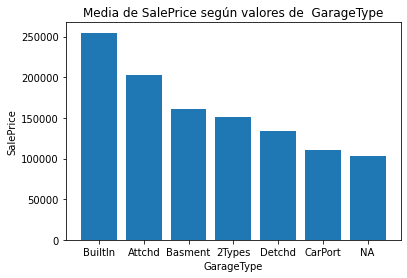

In [99]:
bar_chart('GarageType')

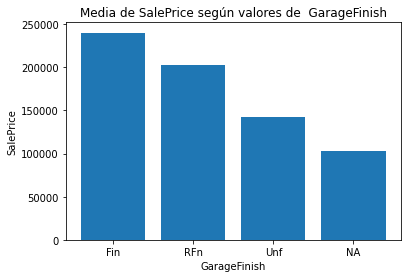

In [100]:
bar_chart('GarageFinish')

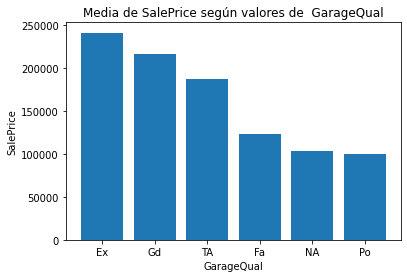

In [101]:
bar_chart('GarageQual')

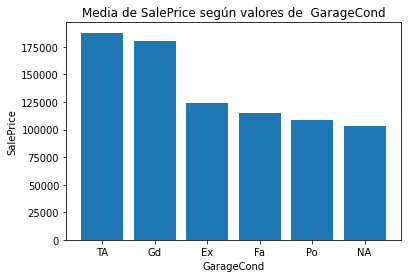

In [102]:
bar_chart('GarageCond')

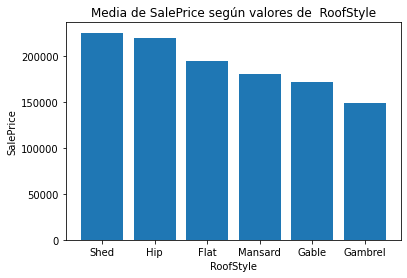

In [103]:
bar_chart('RoofStyle')

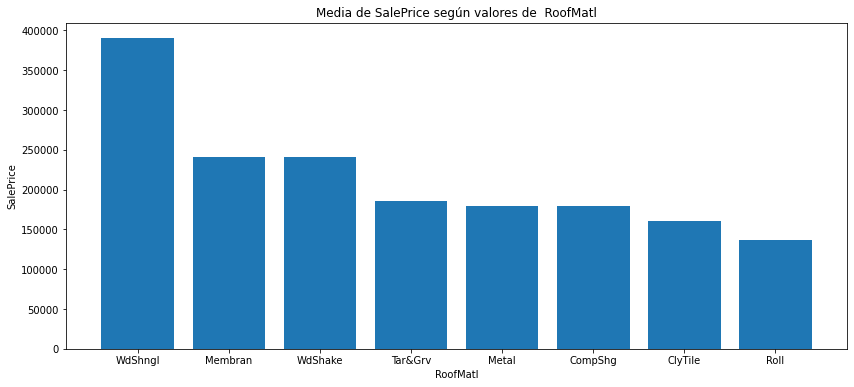

In [104]:
plt.figure(figsize=(14,6))
bar_chart('RoofMatl')

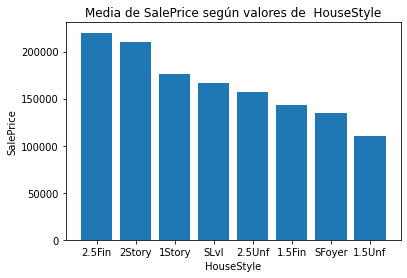

In [105]:
bar_chart('HouseStyle')

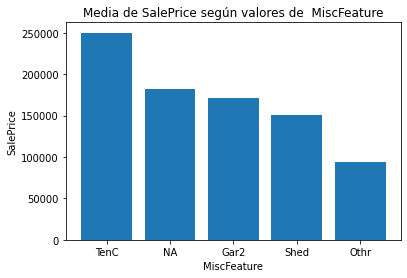

In [106]:
bar_chart('MiscFeature')

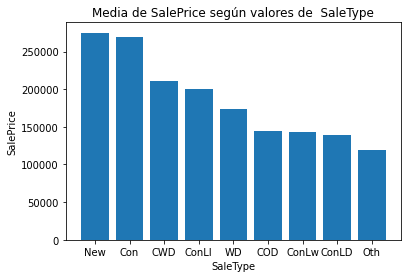

In [107]:
bar_chart('SaleType')

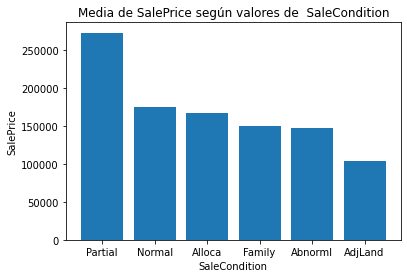

In [108]:
bar_chart('SaleCondition')

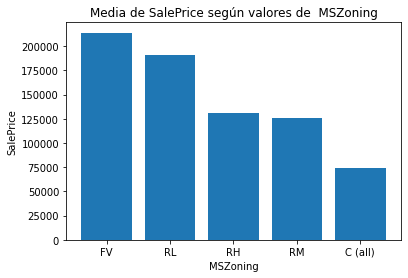

In [109]:
bar_chart('MSZoning')

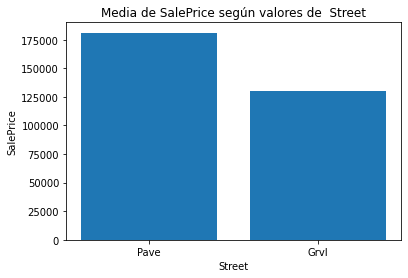

In [110]:
bar_chart('Street')

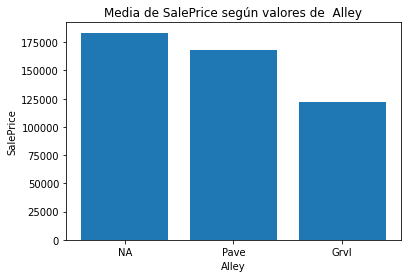

In [111]:
bar_chart('Alley')

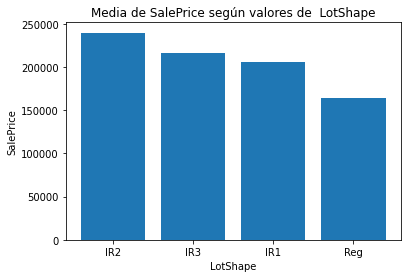

In [112]:
bar_chart('LotShape')

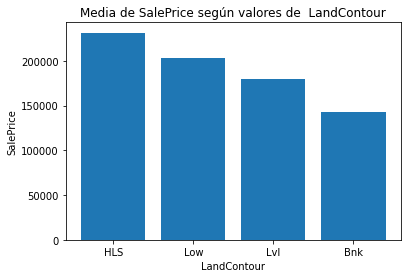

In [113]:
bar_chart('LandContour')

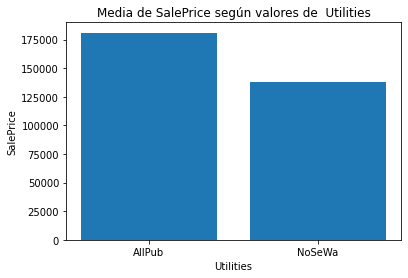

In [114]:
bar_chart('Utilities')

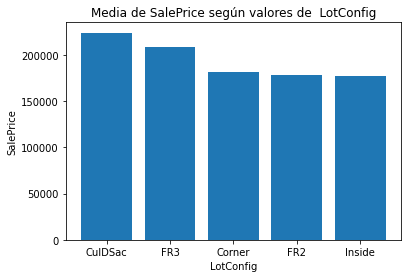

In [115]:
bar_chart('LotConfig')

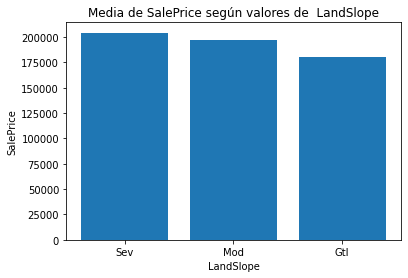

In [116]:
bar_chart('LandSlope')

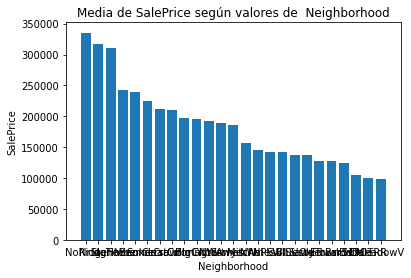

In [117]:
bar_chart('Neighborhood')

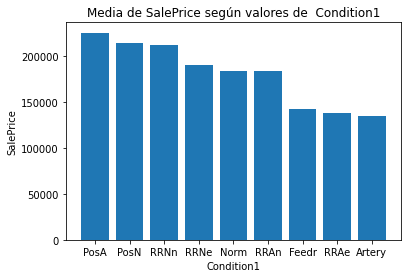

In [118]:
bar_chart('Condition1')

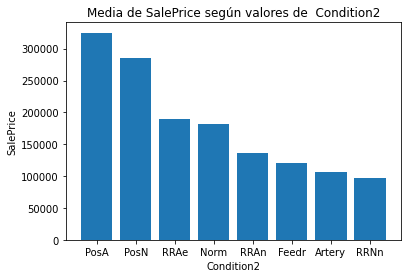

In [119]:
bar_chart('Condition2')

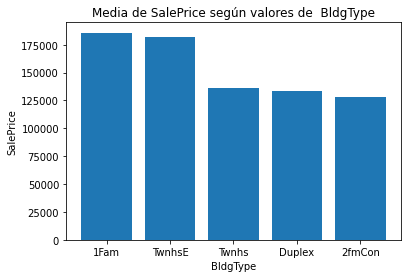

In [120]:
bar_chart('BldgType')

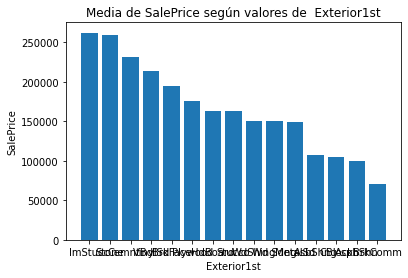

In [121]:
bar_chart('Exterior1st')

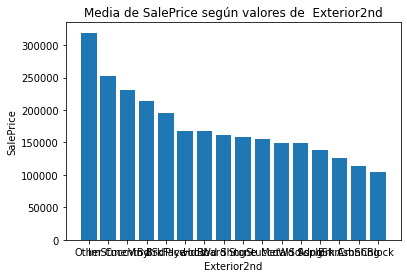

In [122]:
bar_chart('Exterior2nd')

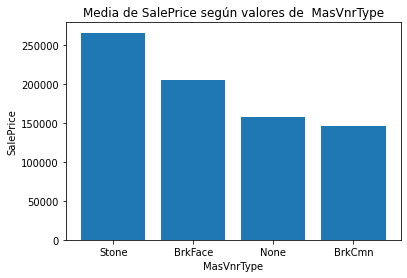

In [123]:
bar_chart('MasVnrType')

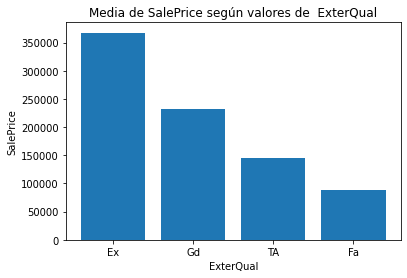

In [124]:
bar_chart('ExterQual')

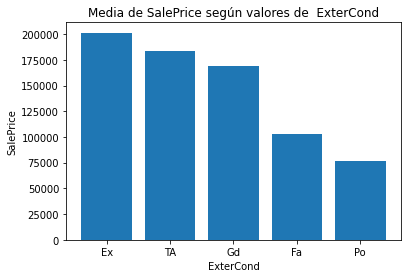

In [125]:
bar_chart('ExterCond')

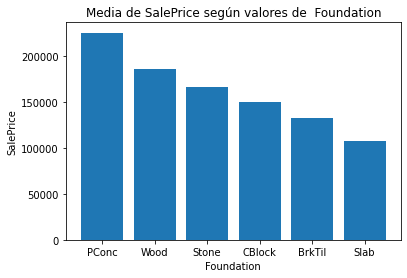

In [126]:
bar_chart('Foundation')

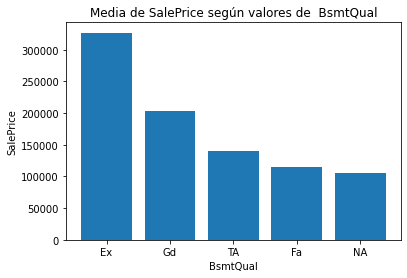

In [127]:
bar_chart('BsmtQual')

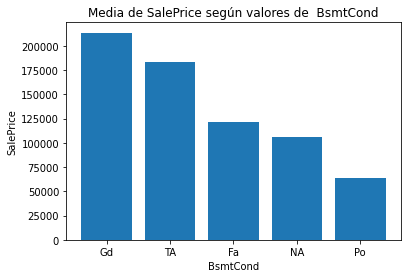

In [128]:
bar_chart('BsmtCond')

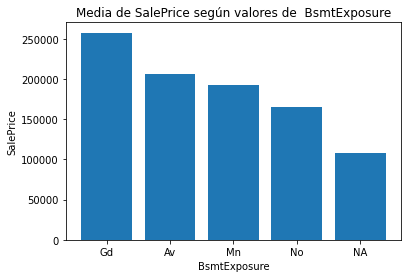

In [129]:
bar_chart('BsmtExposure')

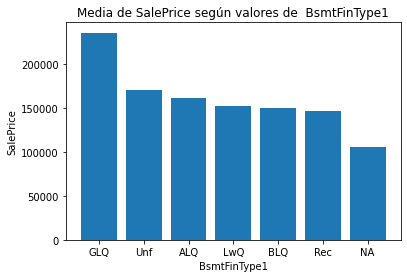

In [130]:
bar_chart('BsmtFinType1')

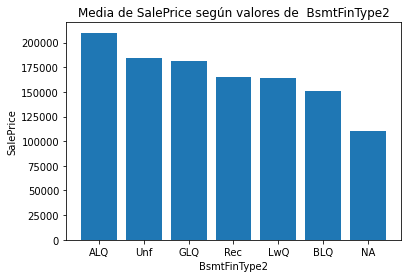

In [131]:
bar_chart('BsmtFinType2')

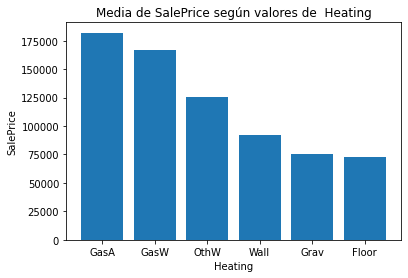

In [132]:
bar_chart('Heating')

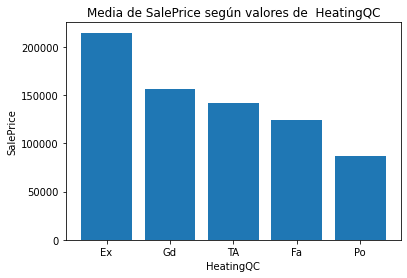

In [133]:
bar_chart('HeatingQC')

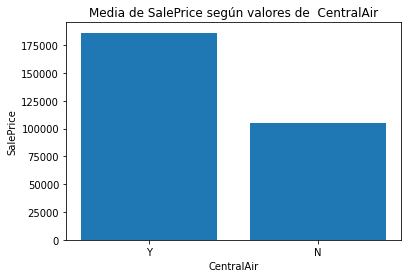

In [134]:
bar_chart('CentralAir')

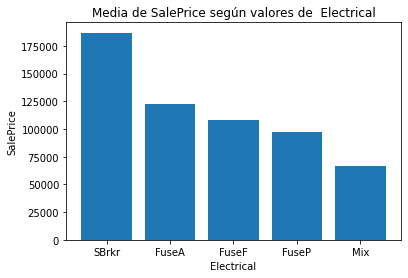

In [135]:
bar_chart('Electrical')

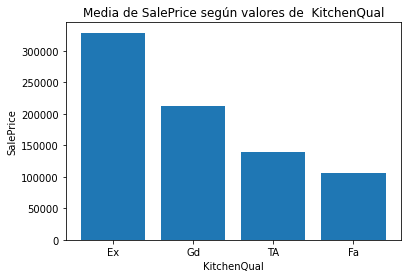

In [136]:
bar_chart('KitchenQual')

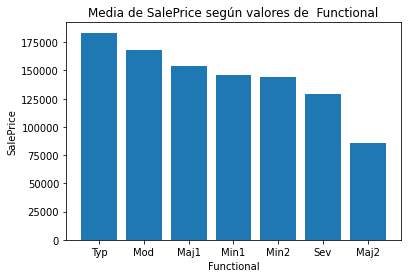

In [137]:
bar_chart('Functional')

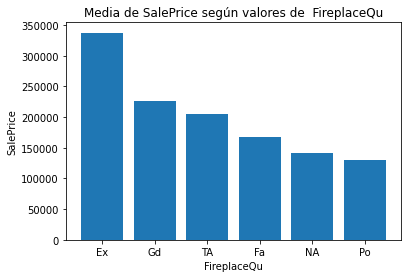

In [138]:
bar_chart('FireplaceQu')

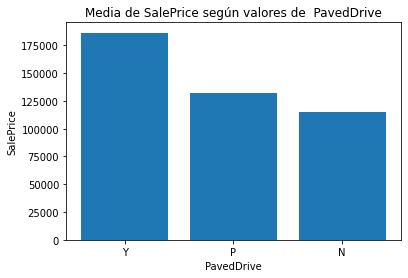

In [139]:
bar_chart('PavedDrive')

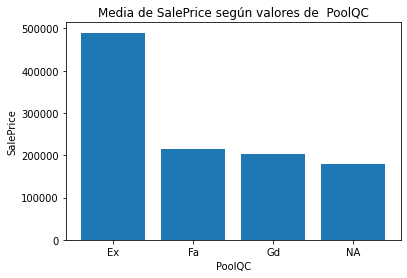

In [140]:
bar_chart('PoolQC')

Analizamos visualmente las variables **columns_numbers1**

In [158]:
columns_numbers1

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

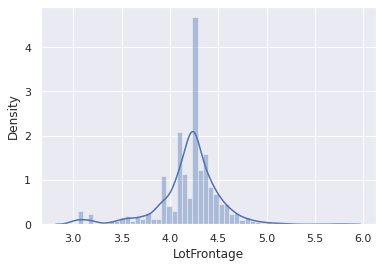

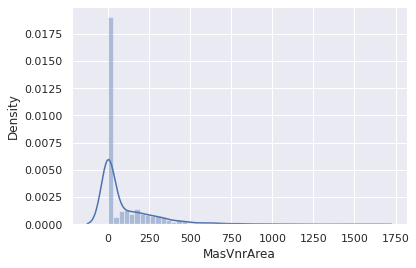

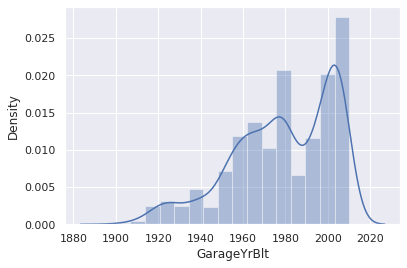

In [159]:
for i in columns_numbers1:
  sns.distplot(xy_train[i])
  plt.show()
plt.show()

In [143]:
num_variables1=['LotFrontage']

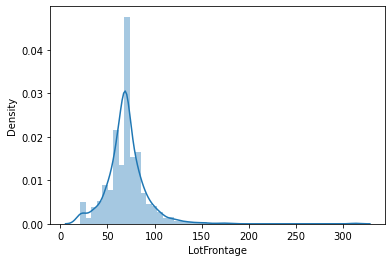

In [144]:
for i in num_variables1:
    sns.distplot(xy_train[i])
    plt.show()
plt.show()

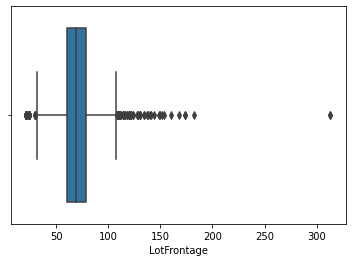

In [145]:
for i in num_variables1:
    sns.boxplot(xy_train[i])
    plt.show()
plt.show()

In [146]:
for i in num_variables1:
    X_train[i]=np.log(X_train[i])    
    X_test[i]=np.log(X_test[i])
    xy_train[i]=np.log(xy_train[i])


Volvemos a ver estas variables

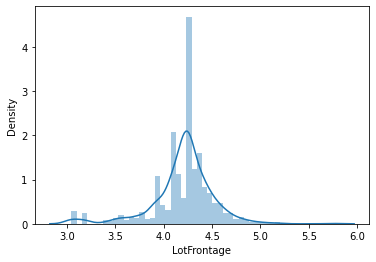

In [147]:
for i in num_variables1:
    sns.distplot(xy_train[i])
    plt.show()
plt.show()

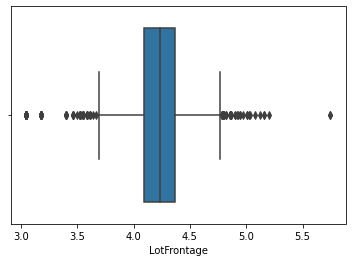

In [148]:
for i in num_variables1:
    sns.boxplot(xy_train[i])
    plt.show()
plt.show()

Analizamos visualmente las variables **columns_numbers2**

In [149]:
columns_numbers2

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

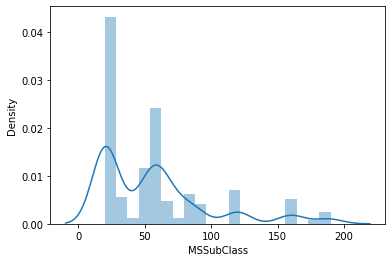

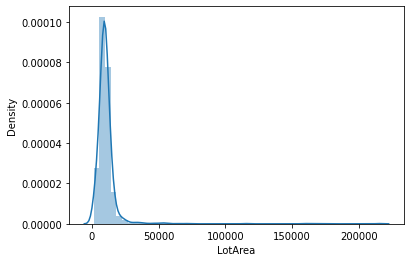

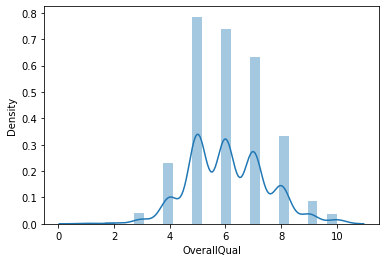

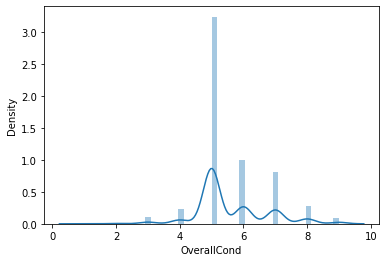

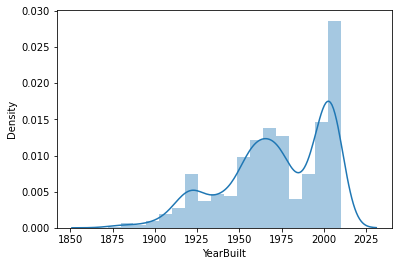

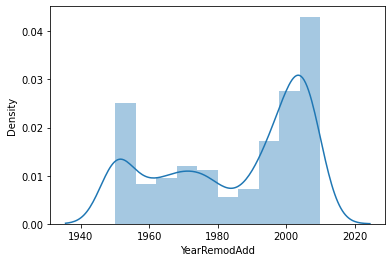

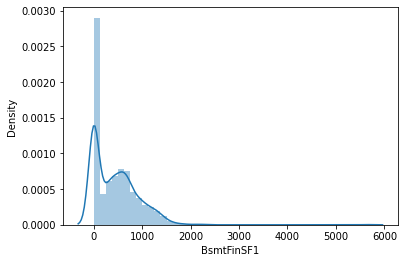

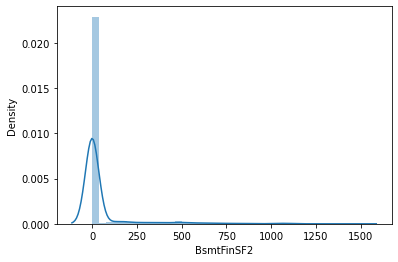

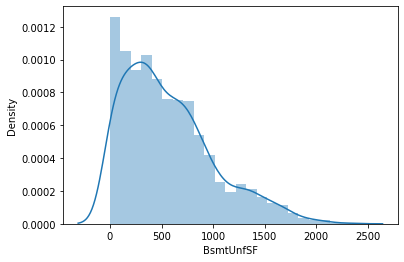

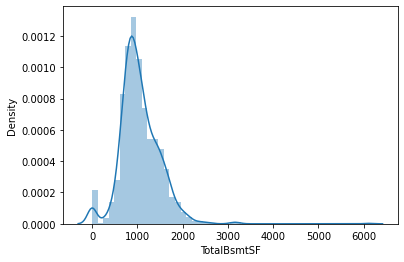

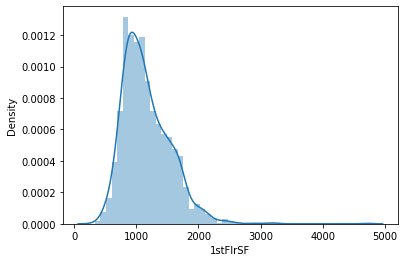

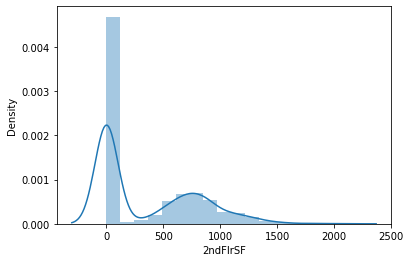

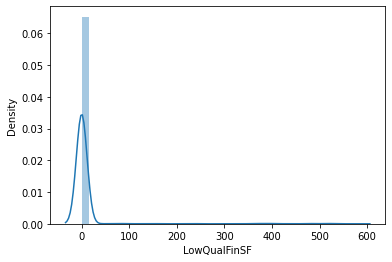

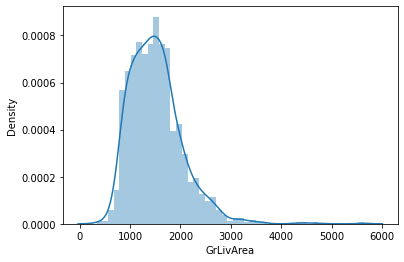

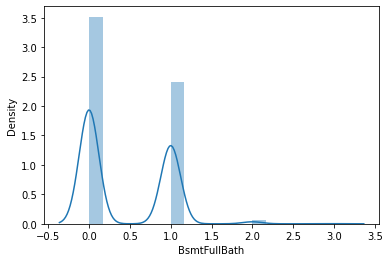

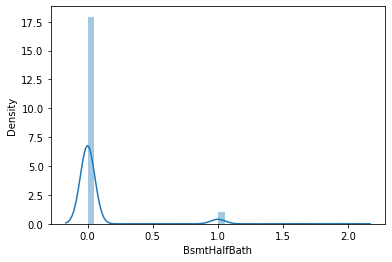

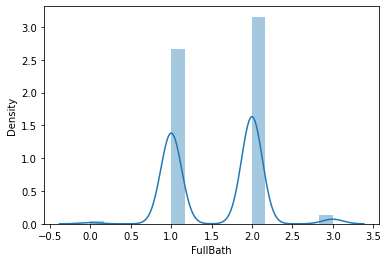

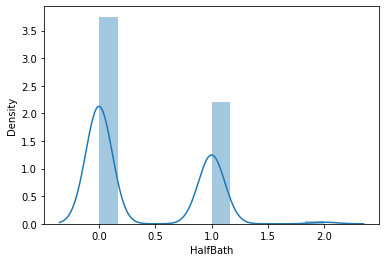

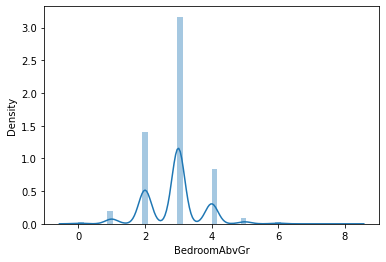

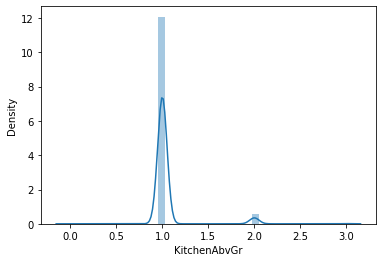

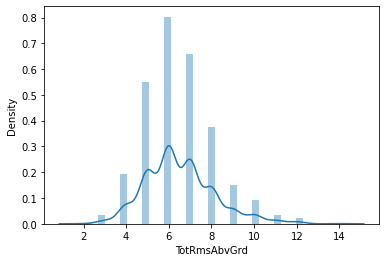

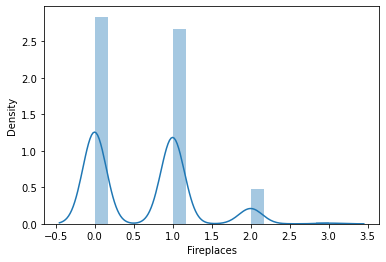

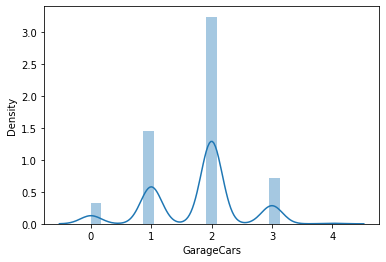

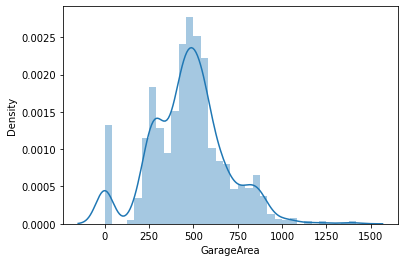

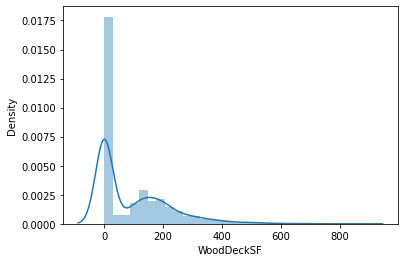

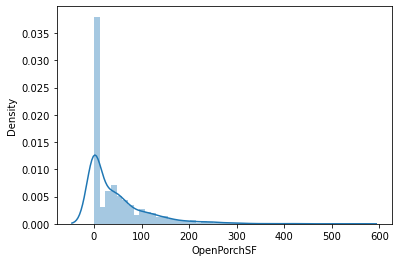

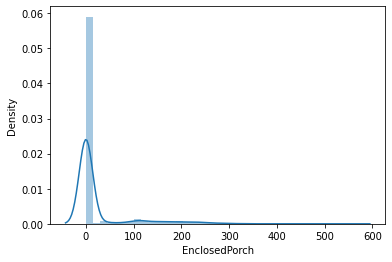

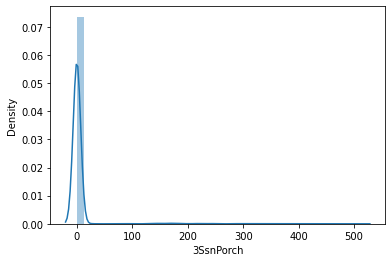

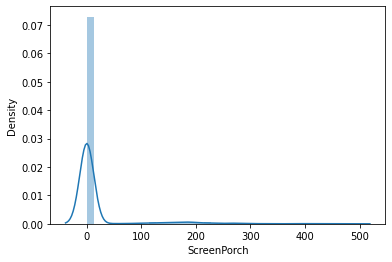

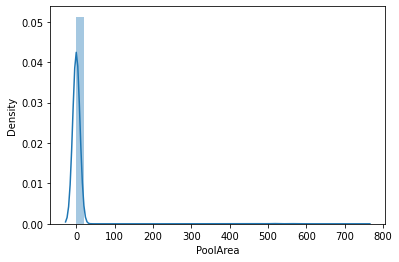

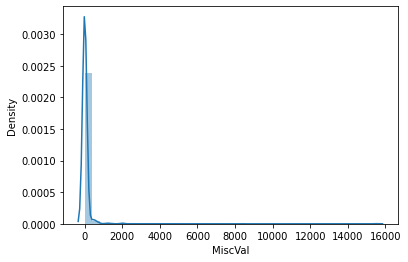

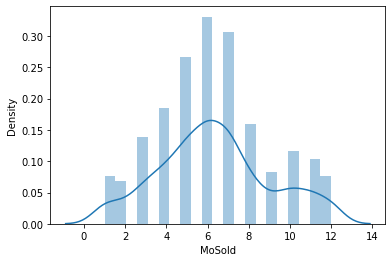

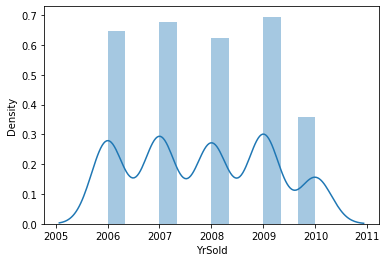

In [150]:
for i in columns_numbers2:
  sns.distplot(xy_train[i])
  plt.show()
plt.show()

In [151]:
num_variables2=['LotArea', '1stFlrSF', 'GrLivArea']

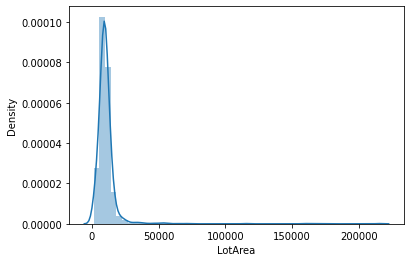

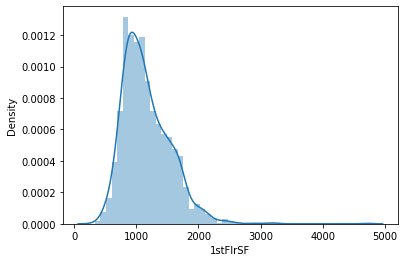

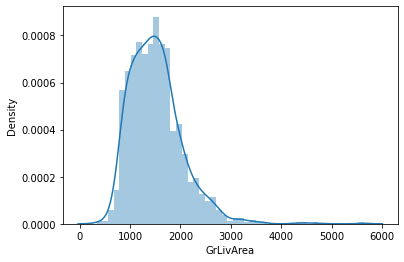

In [152]:
for i in num_variables2:
    sns.distplot(xy_train[i])
    plt.show()
plt.show()

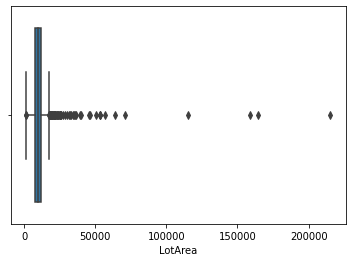

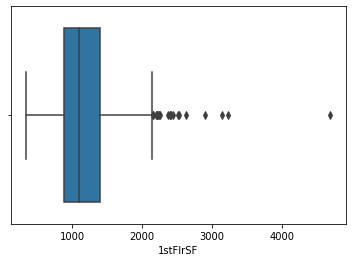

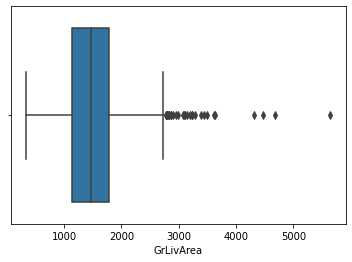

In [153]:
for i in num_variables2:
    sns.boxplot(xy_train[i])
    plt.show()
plt.show()

In [154]:
for i in num_variables2:
    X_train[i]=np.log(X_train[i])    
    X_test[i]=np.log(X_test[i])
    xy_train[i]=np.log(xy_train[i])


Volvemos a ver estas variables

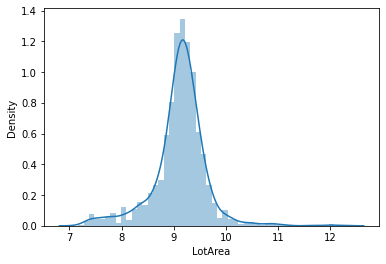

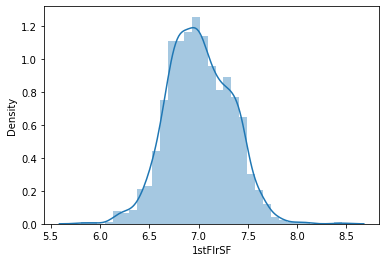

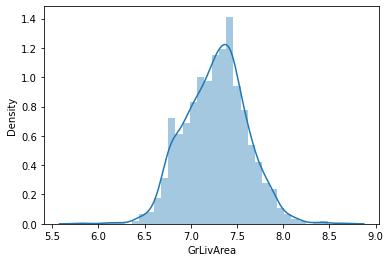

In [155]:
for i in num_variables2:
    sns.distplot(xy_train[i])
    plt.show()
plt.show()

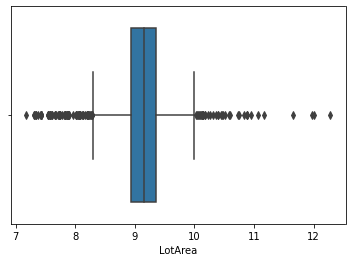

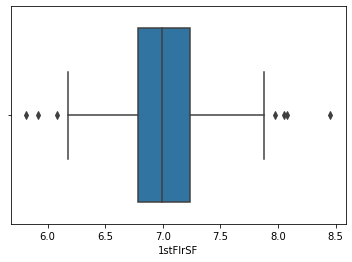

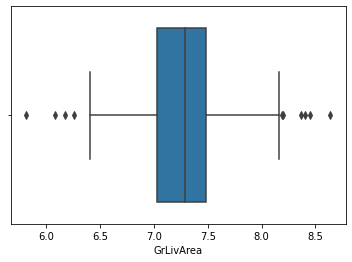

In [156]:
for i in num_variables2:
    sns.boxplot(xy_train[i])
    plt.show()
plt.show()

Las 10 variables que más afectan al precio, sacadas de la correlación anterior (correlation.head(11))




* SalePrice	1.000000
* OverallQual	0.790982
* GrLivArea	0.708624
* GarageCars	0.640409
* GarageArea	0.623431
* TotalBsmtSF	0.613581
* 1stFlrSF	0.605852
* FullBath	0.560664
* TotRmsAbvGrd	0.533723
* YearBuilt	0.522897
* YearRemodAdd	0.507101

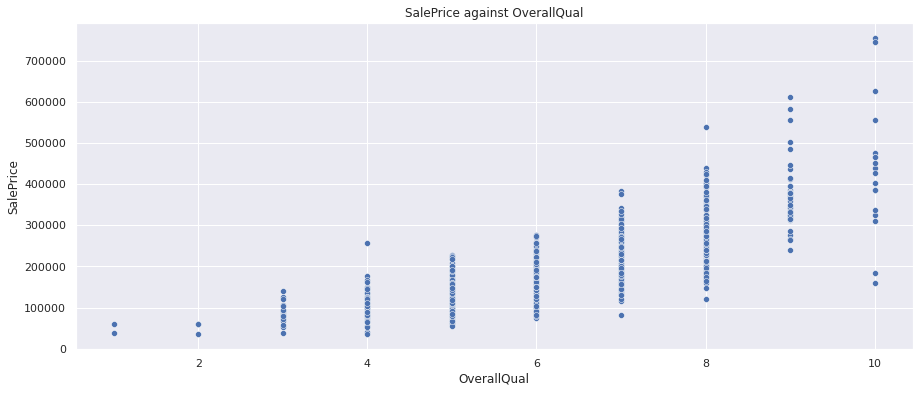

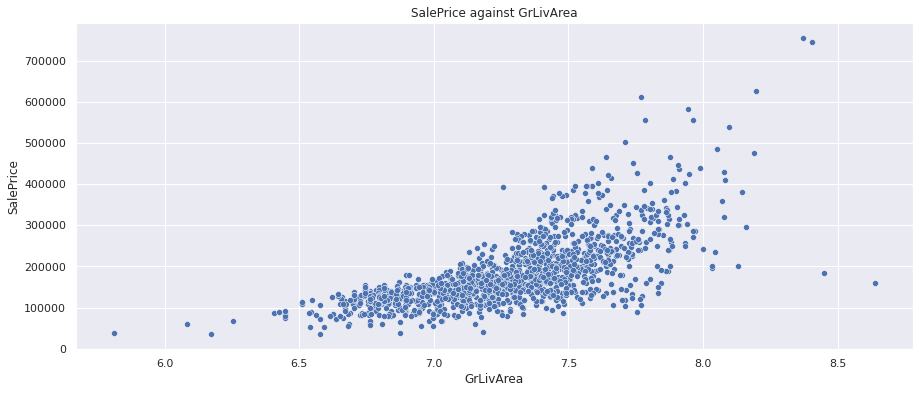

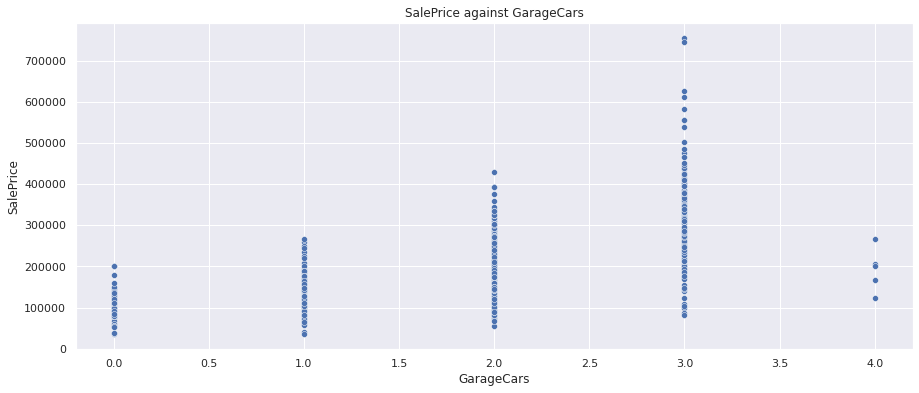

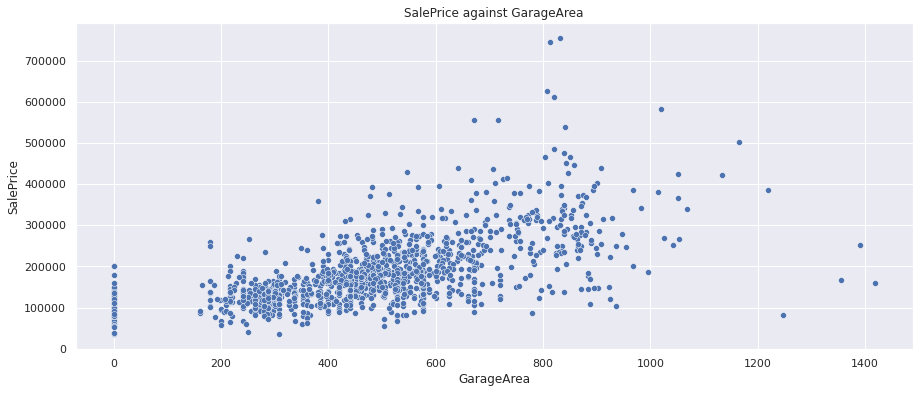

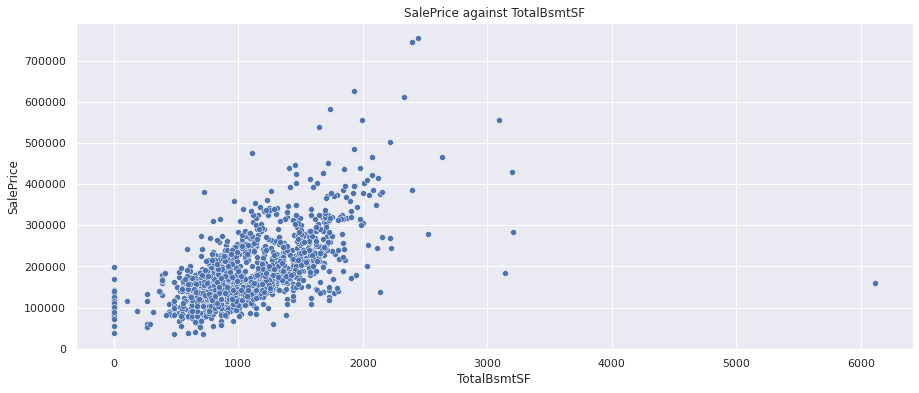

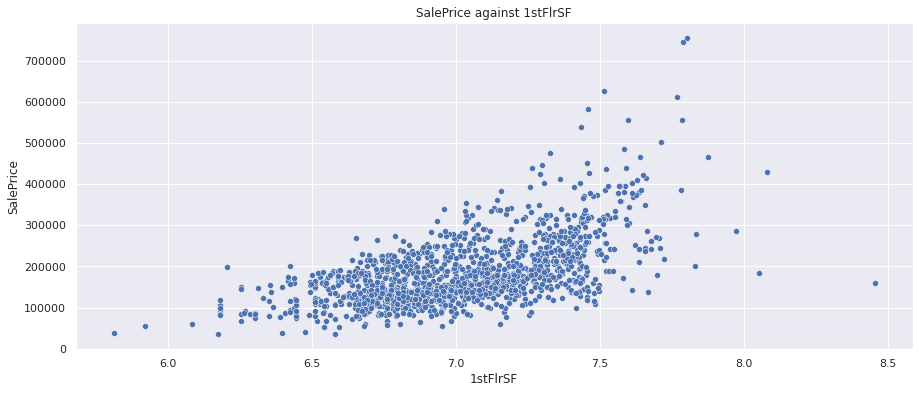

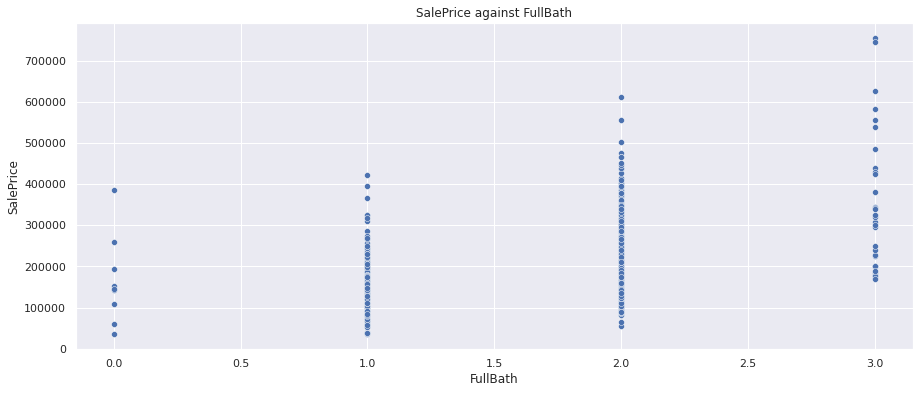

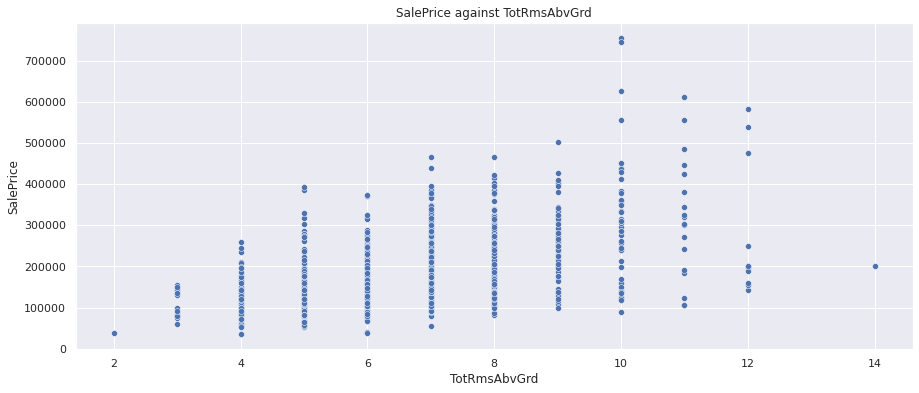

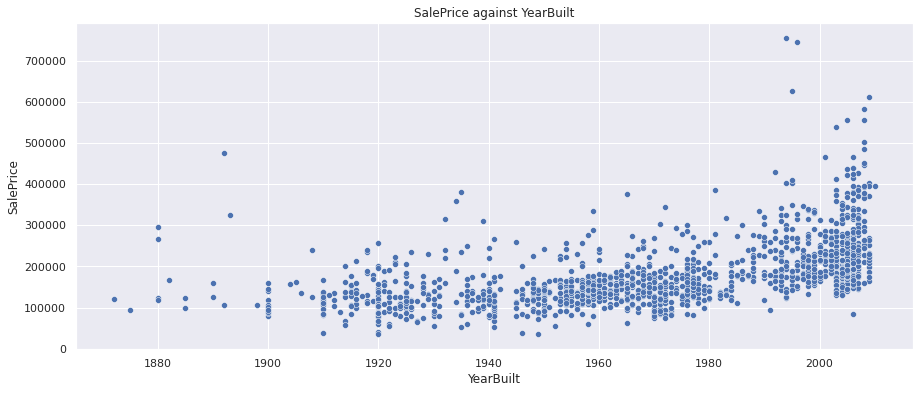

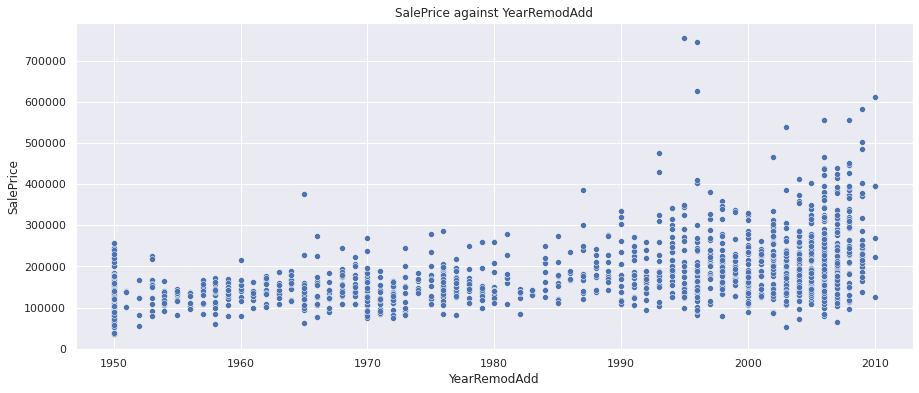

In [157]:
# ver Top10 correlation vs SalesPrice 

sns.set_theme()
for i in (xy_train[['OverallQual','GrLivArea','GarageCars','GarageArea', 'TotalBsmtSF', 
                    '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']].columns):
    plt.figure(figsize=(15,6))
    sns.scatterplot(x=i,data=xy_train,y=xy_train['SalePrice'])
    plt.title('SalePrice against {}'.format(i))
    plt.show()

#Valores extremos

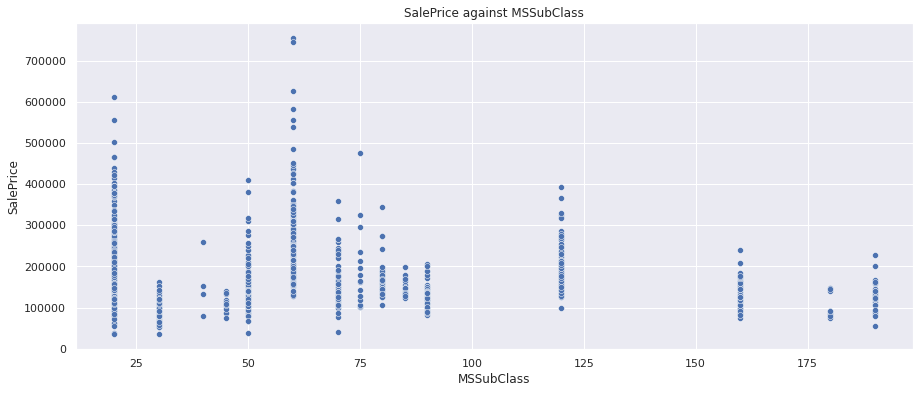

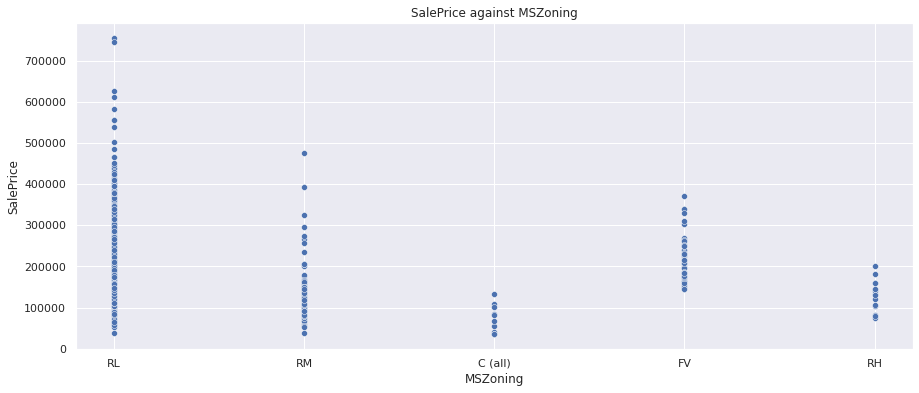

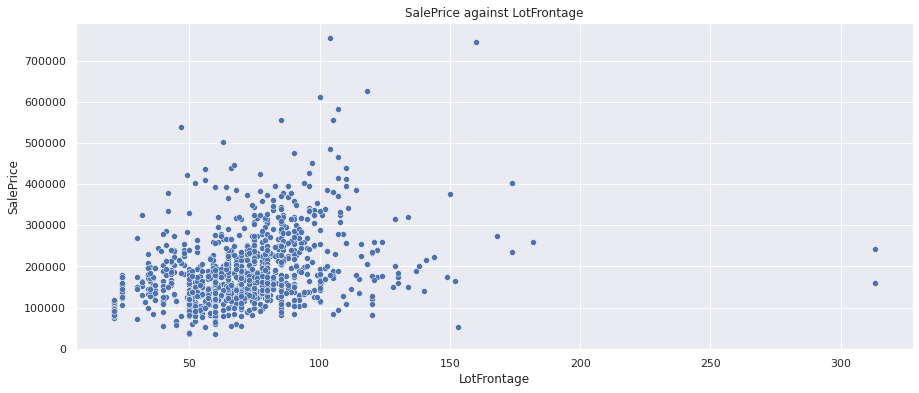

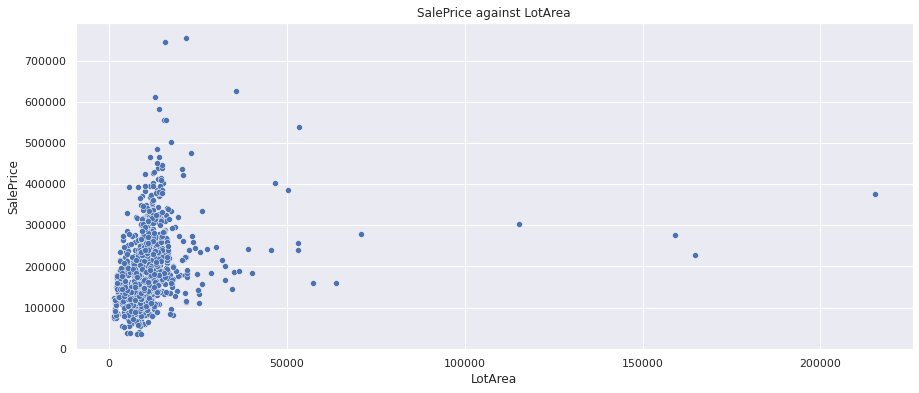

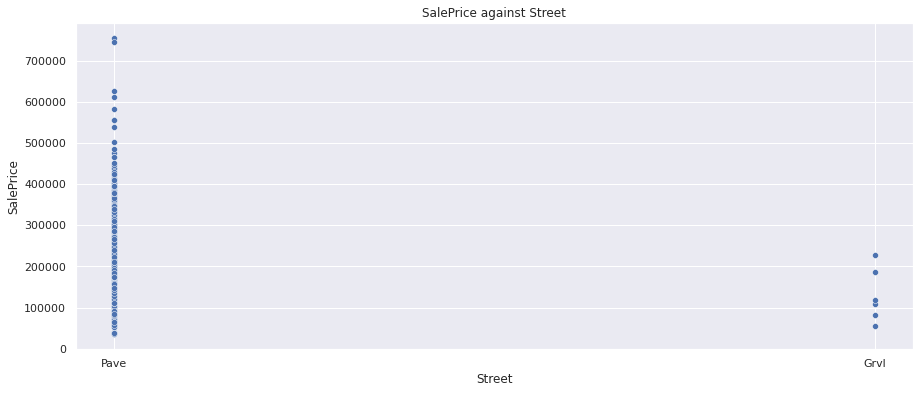

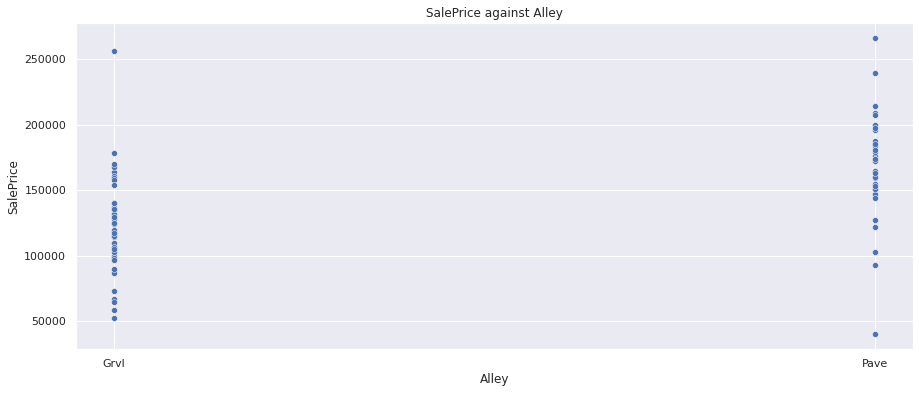

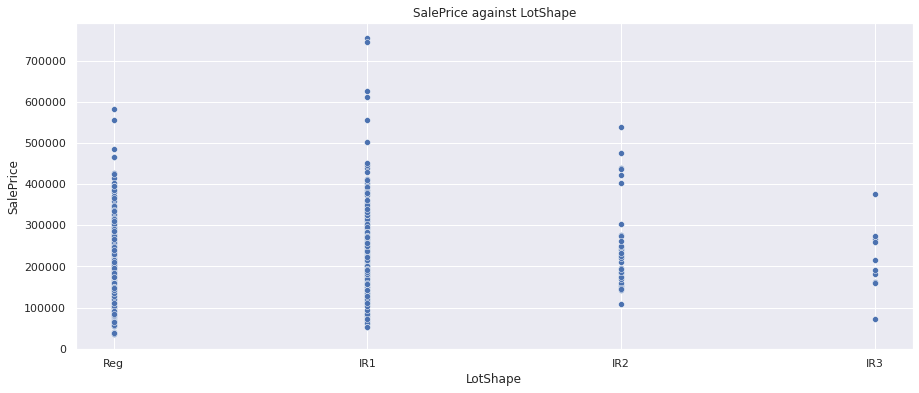

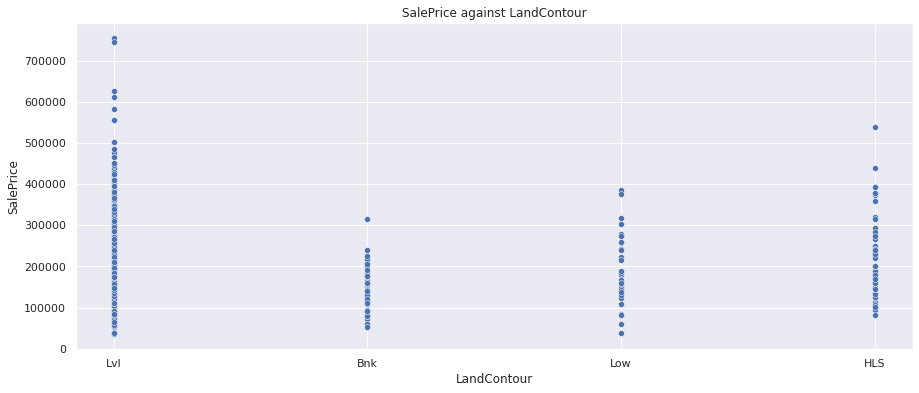

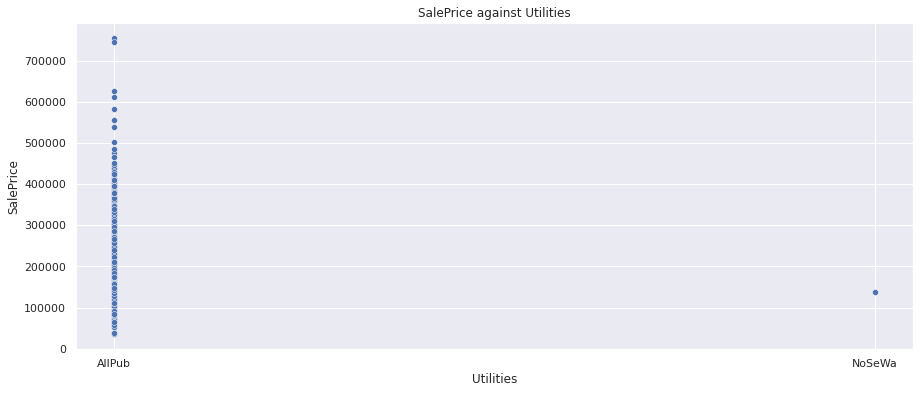

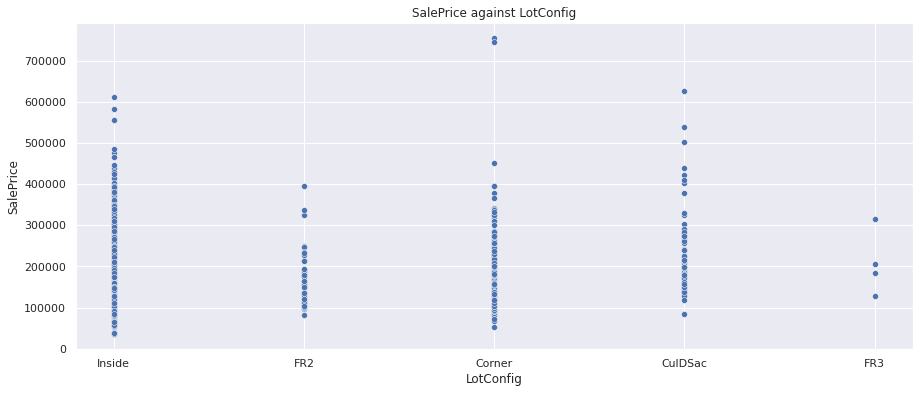

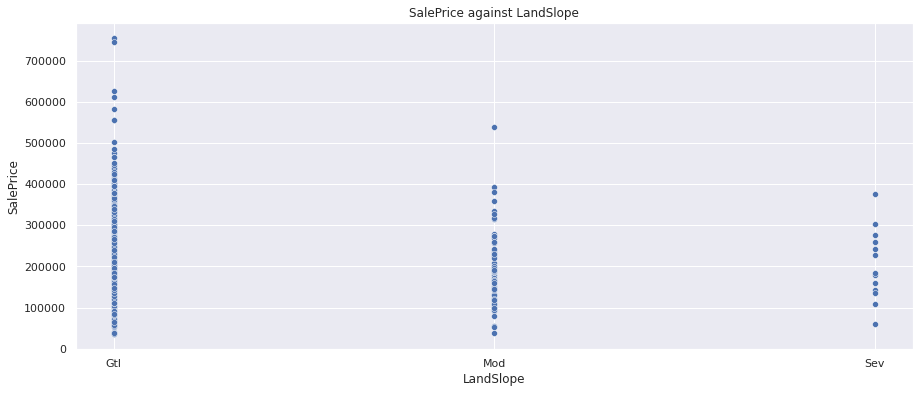

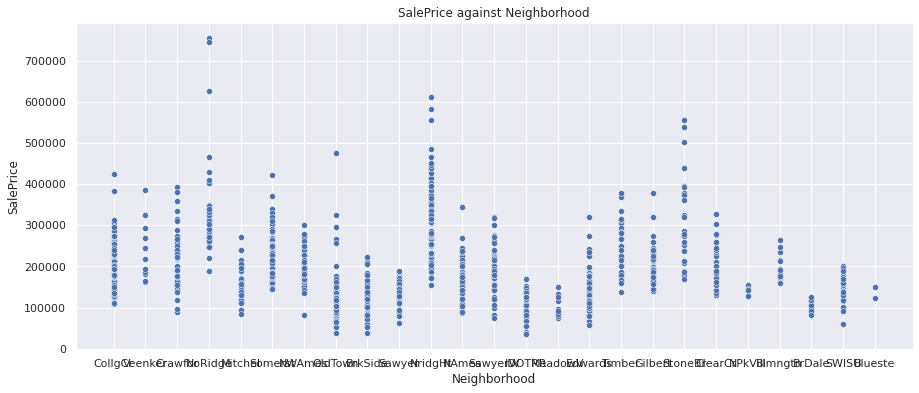

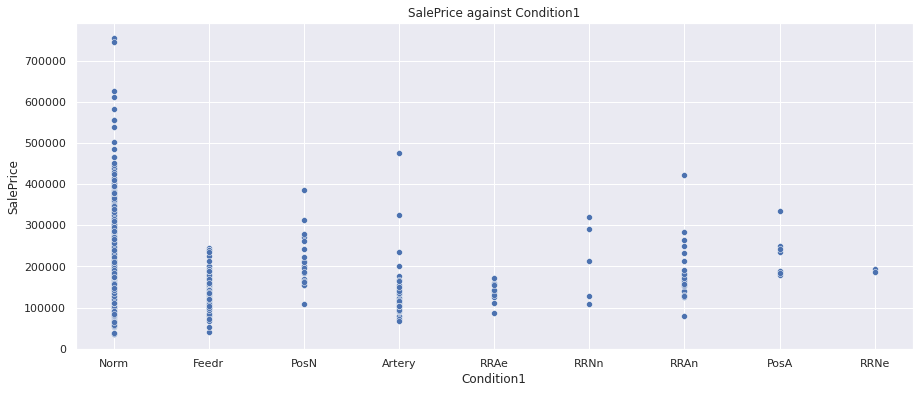

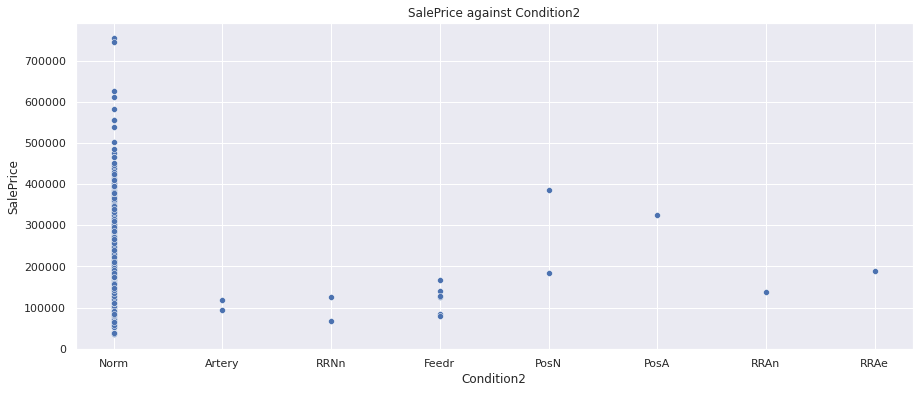

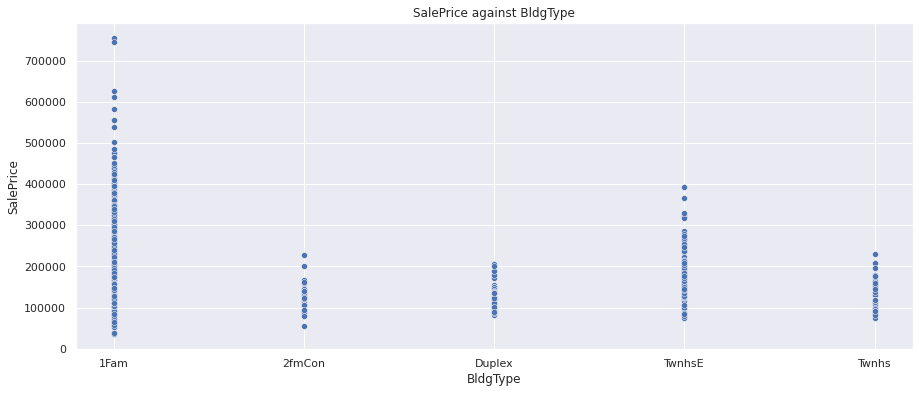

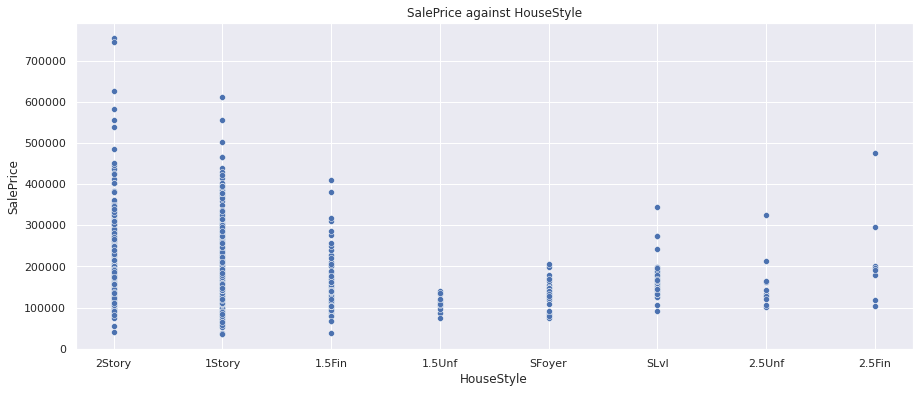

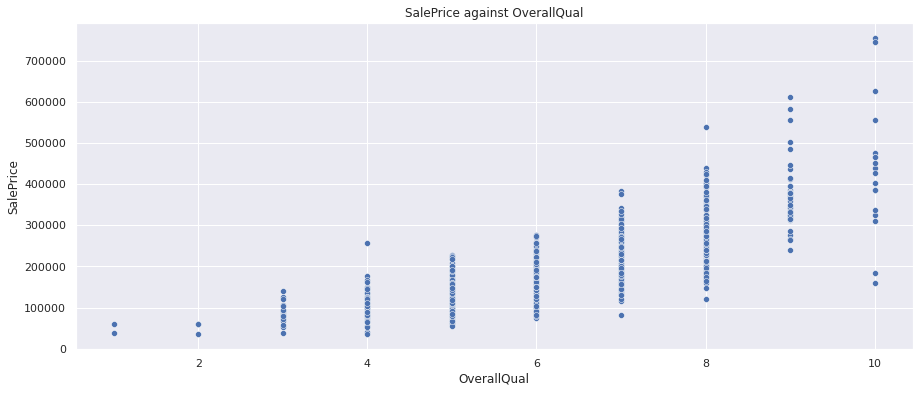

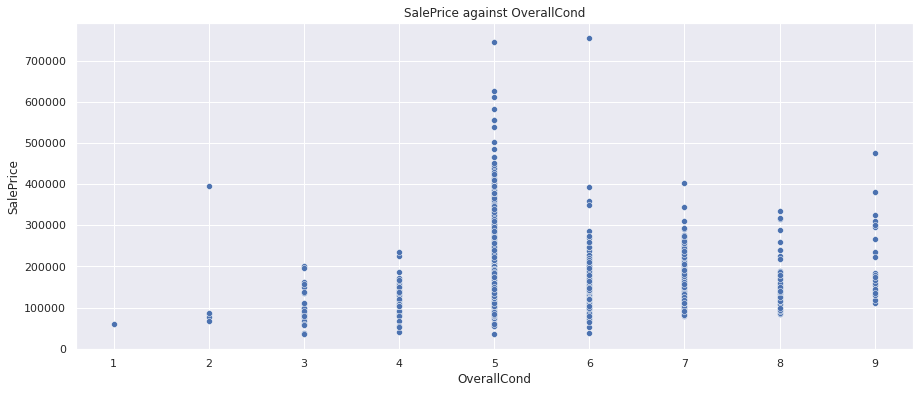

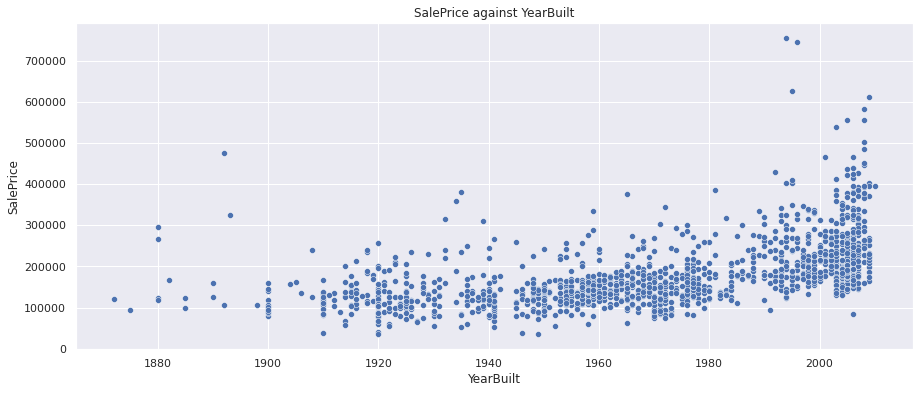

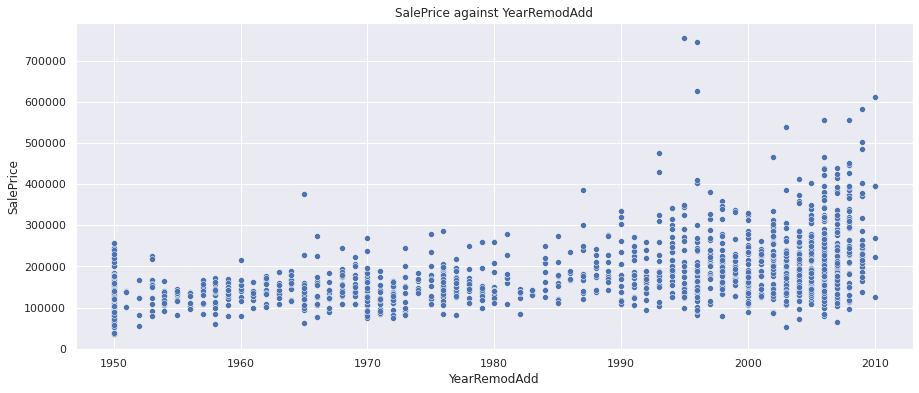

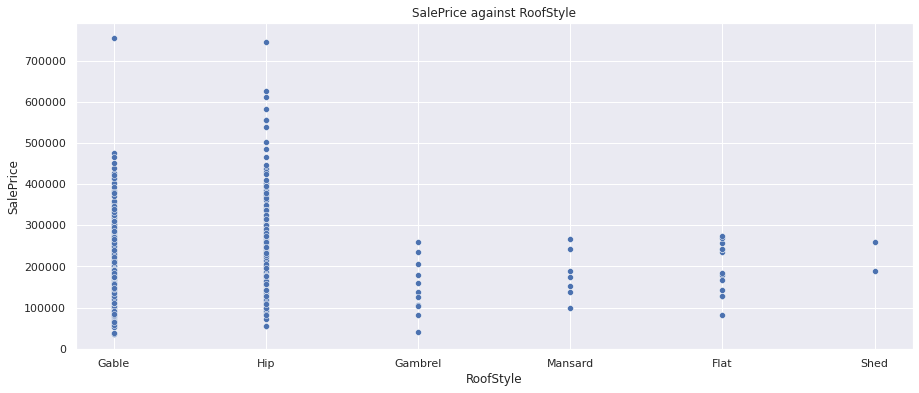

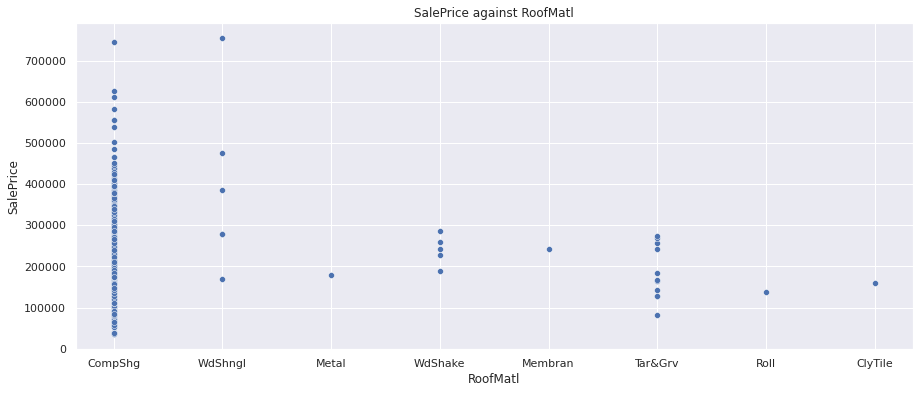

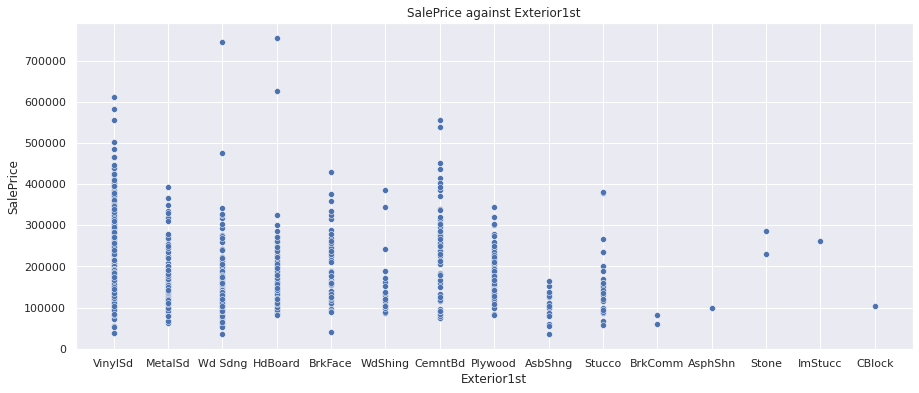

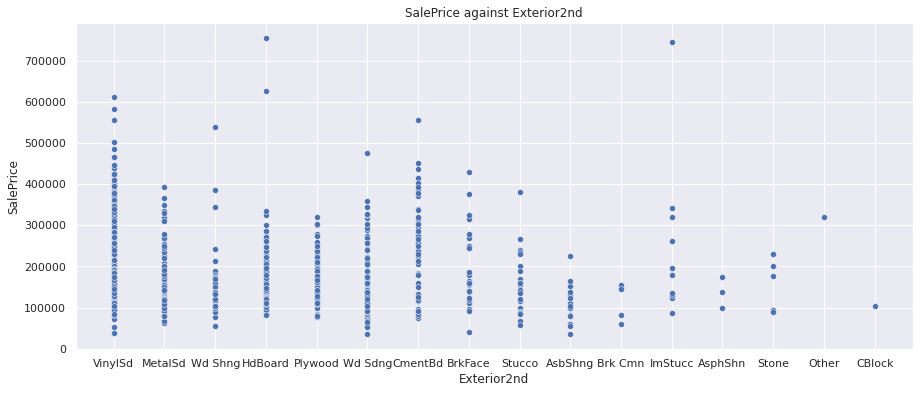

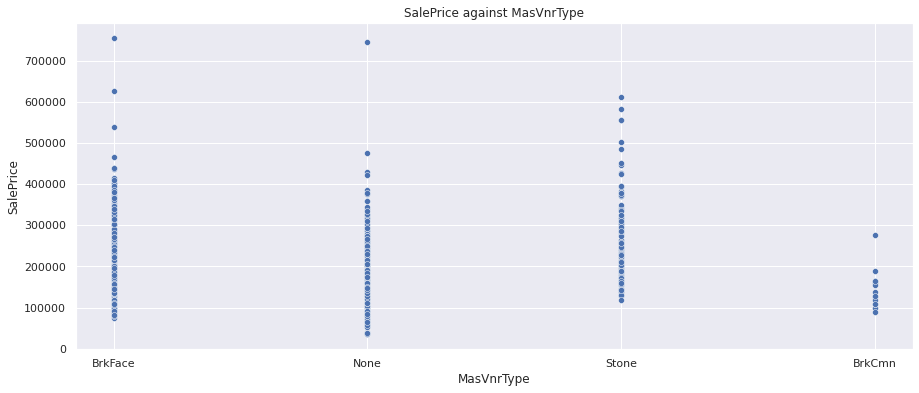

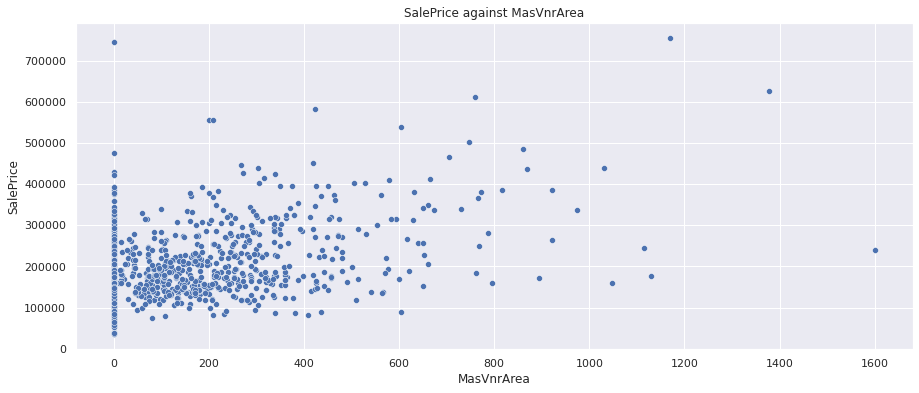

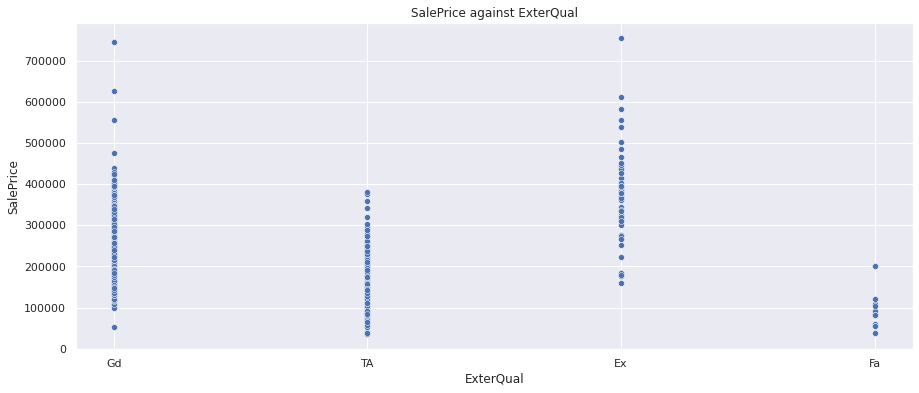

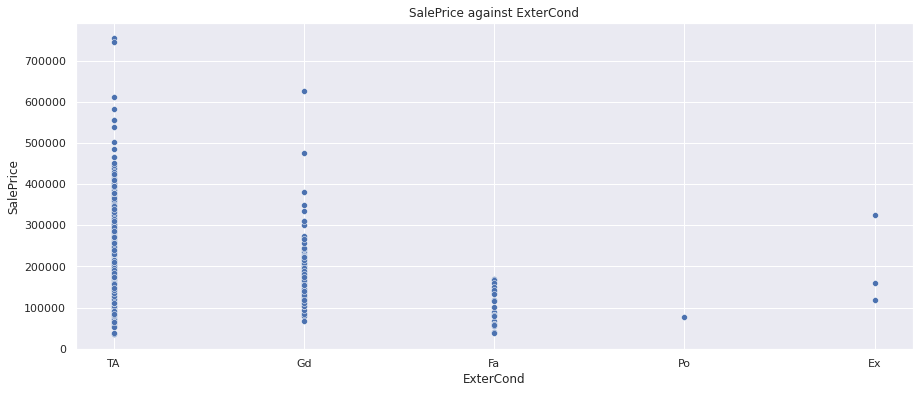

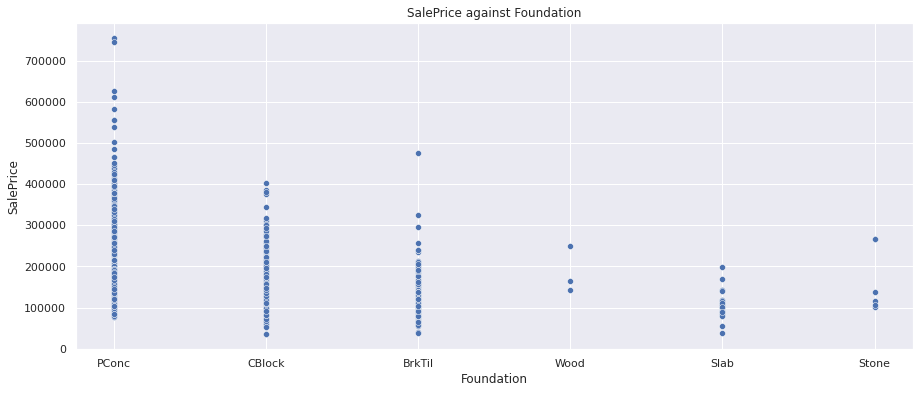

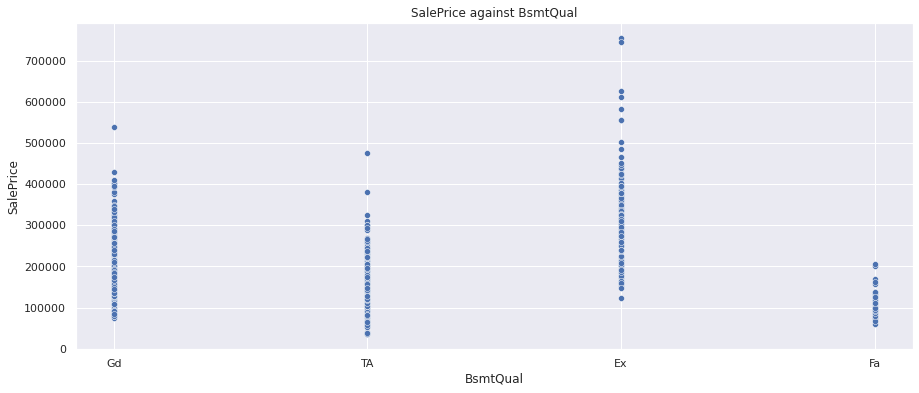

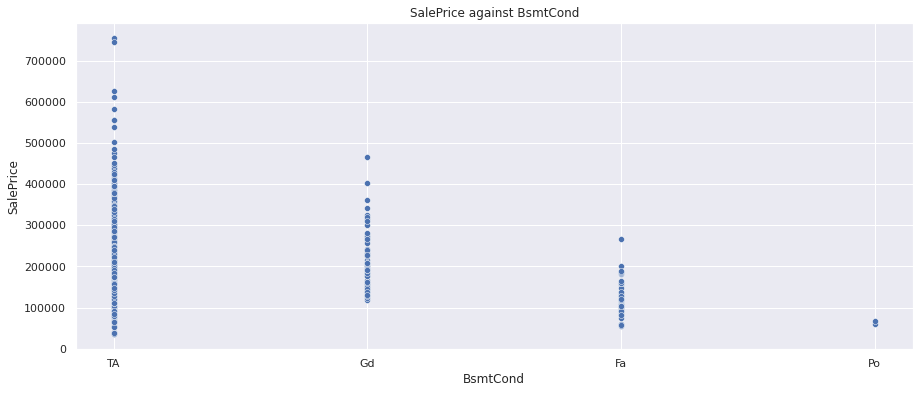

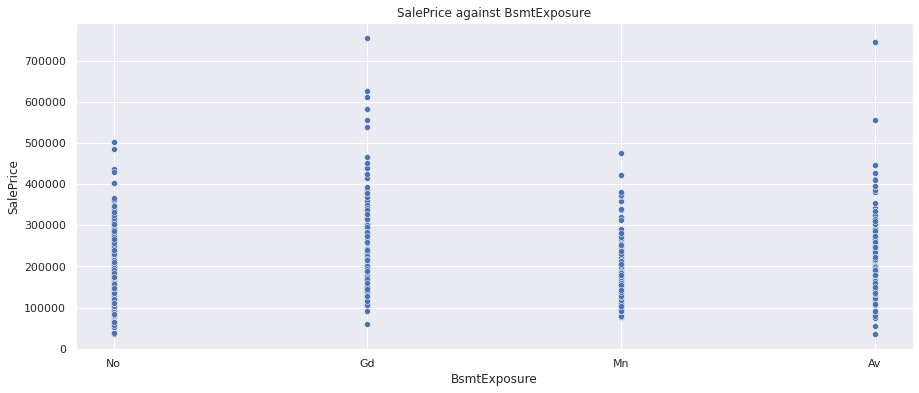

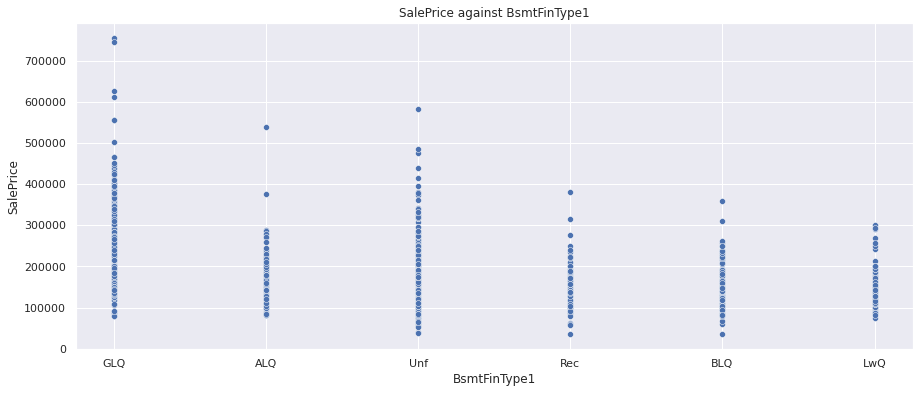

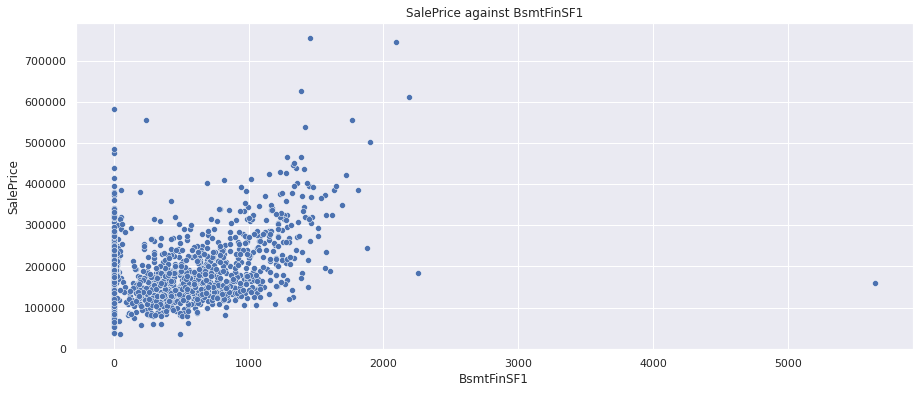

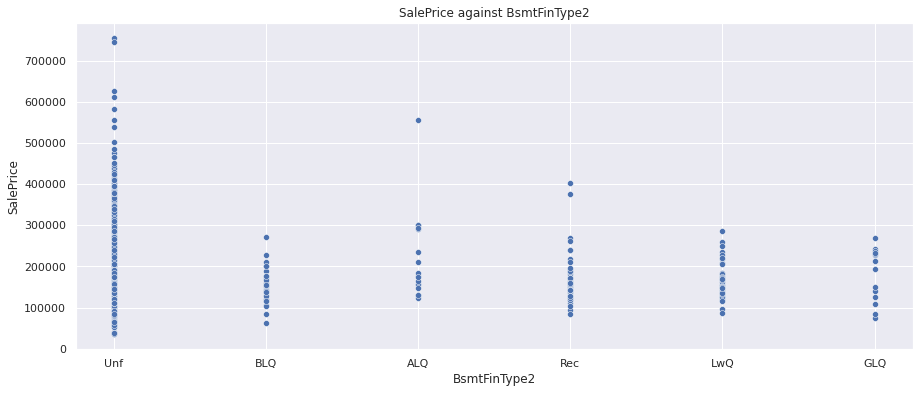

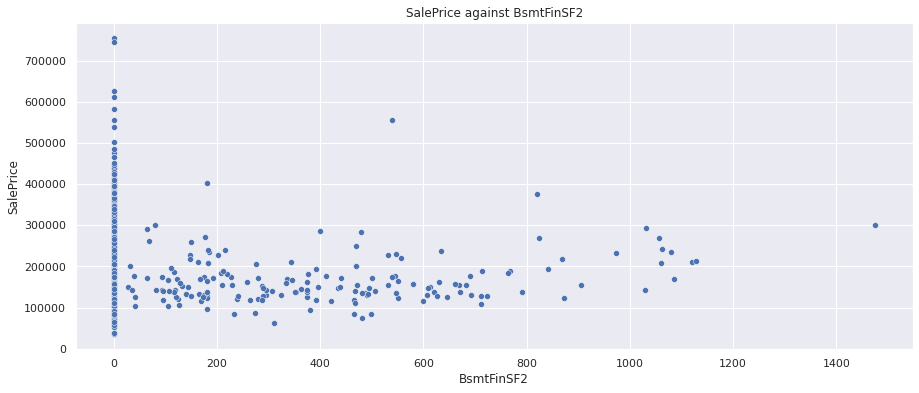

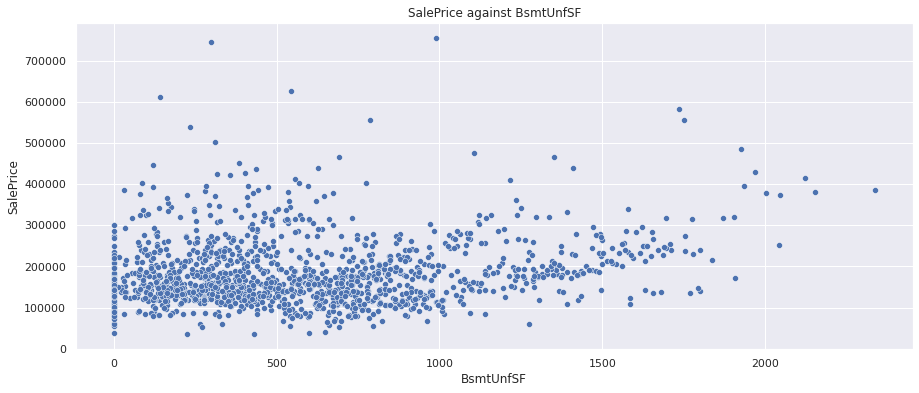

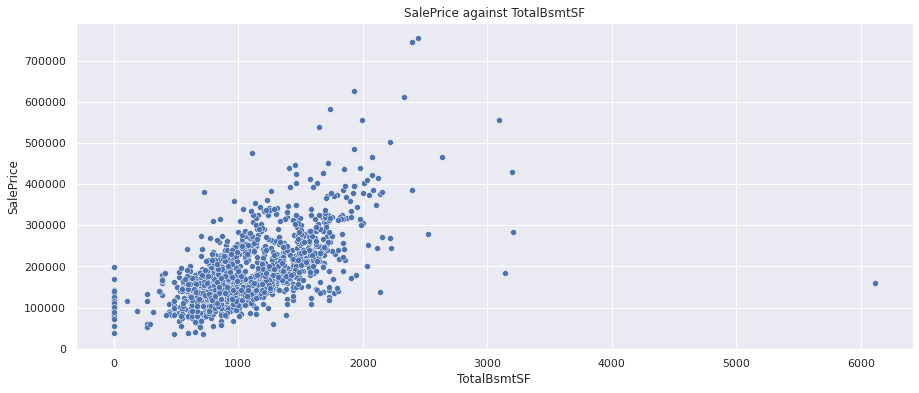

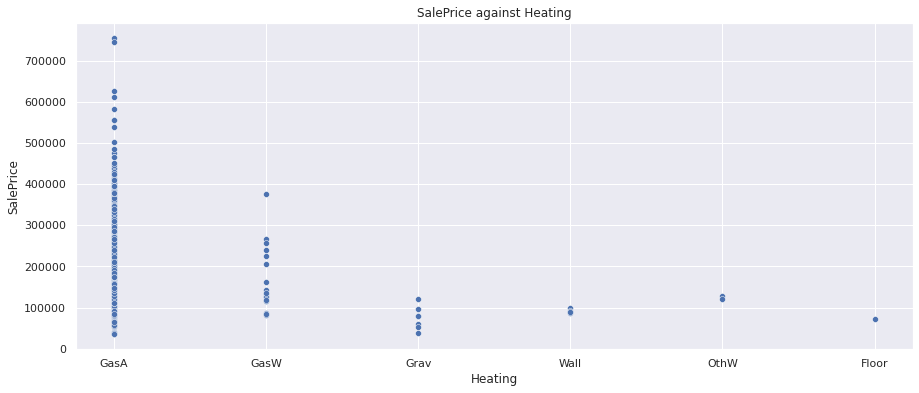

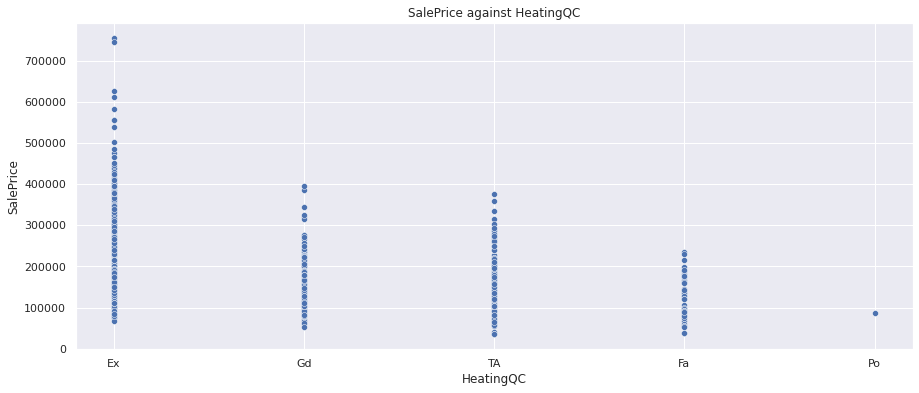

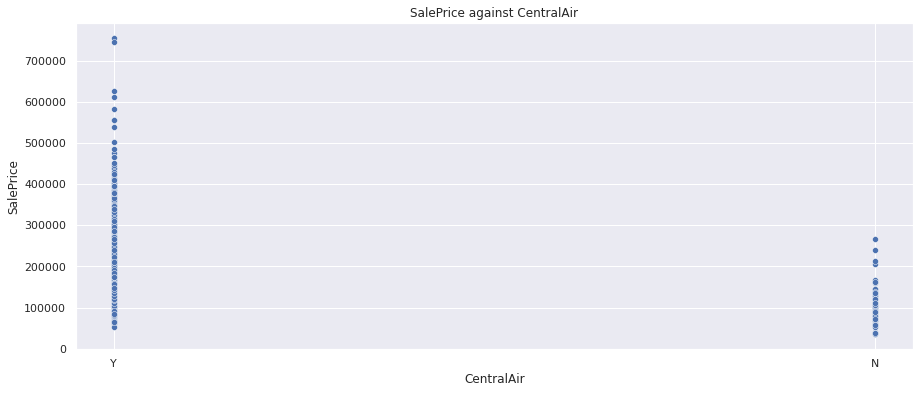

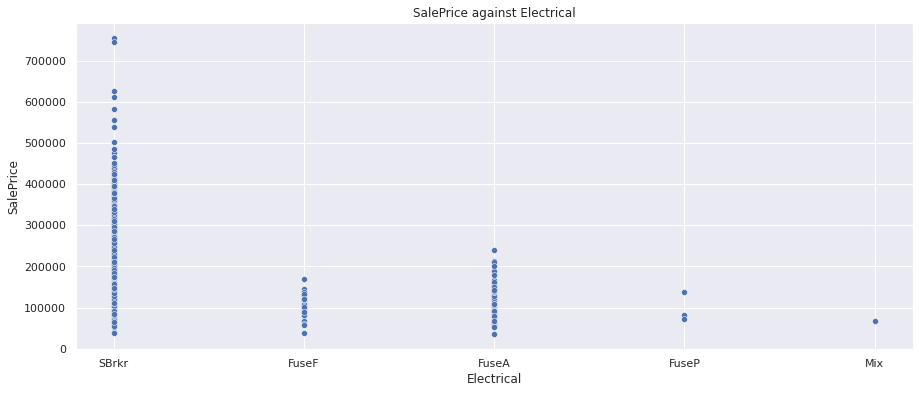

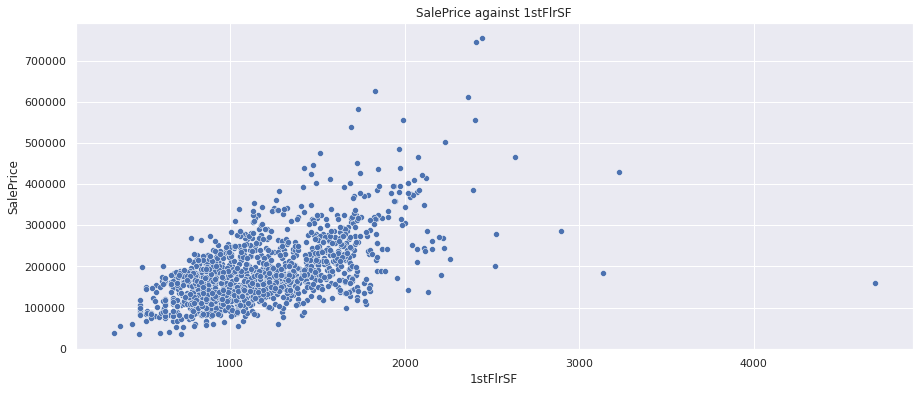

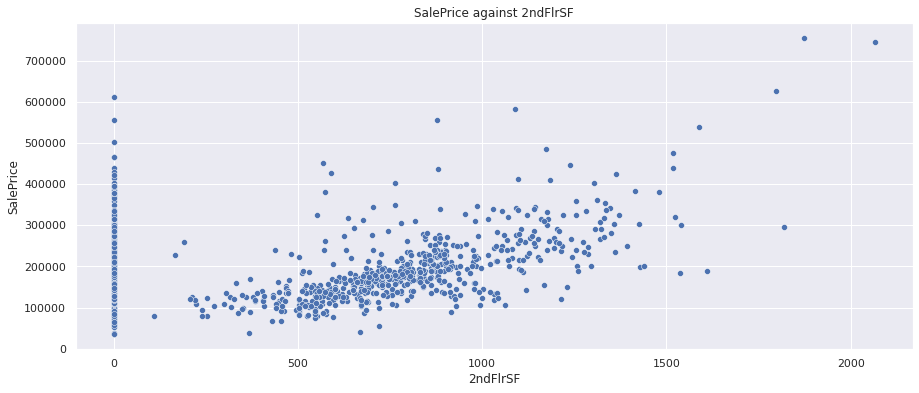

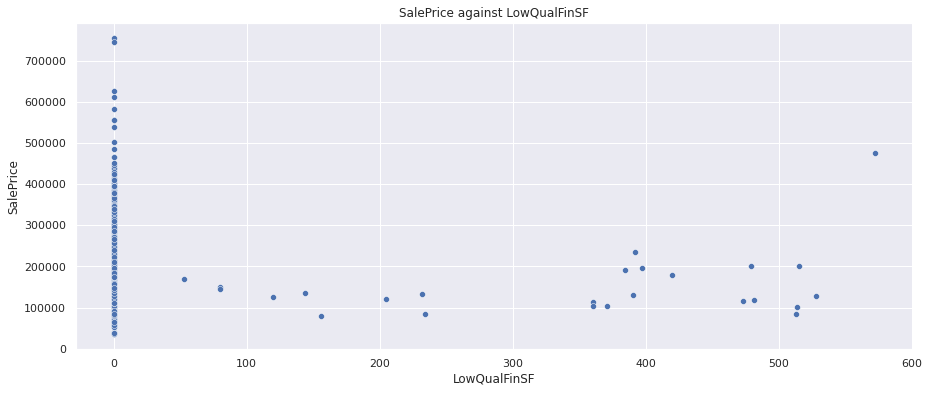

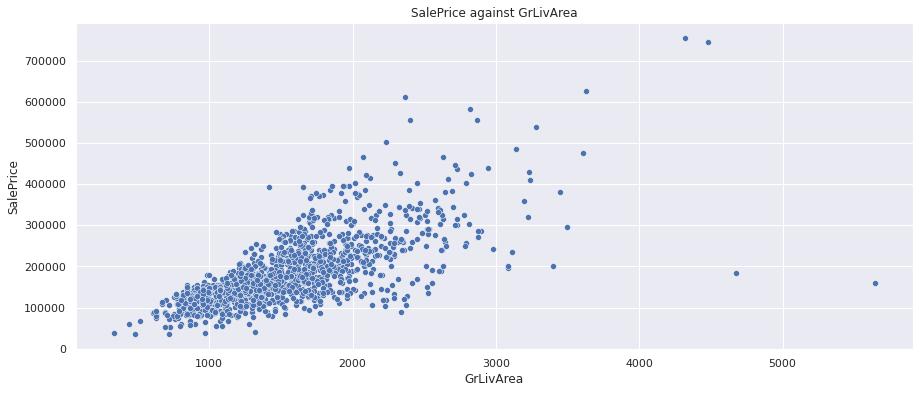

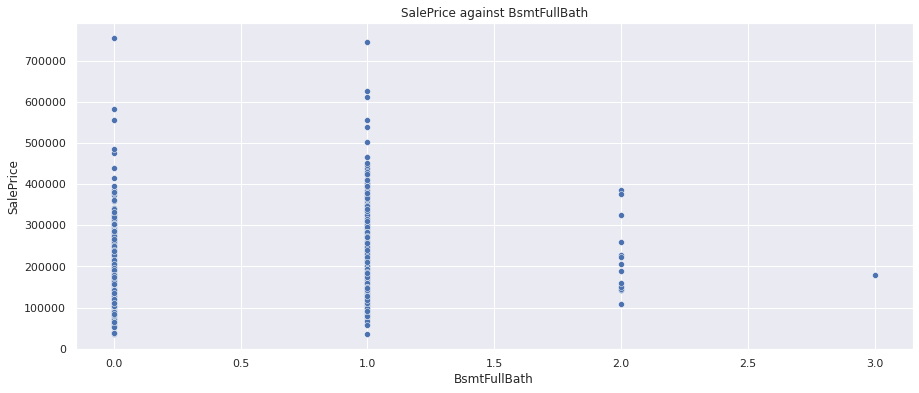

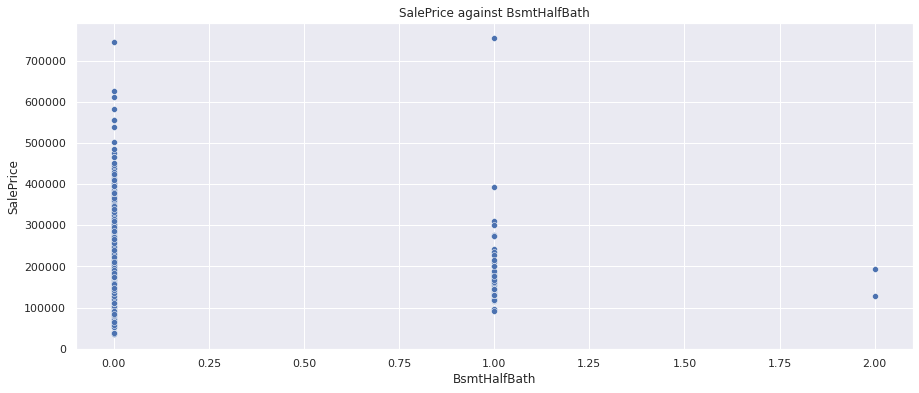

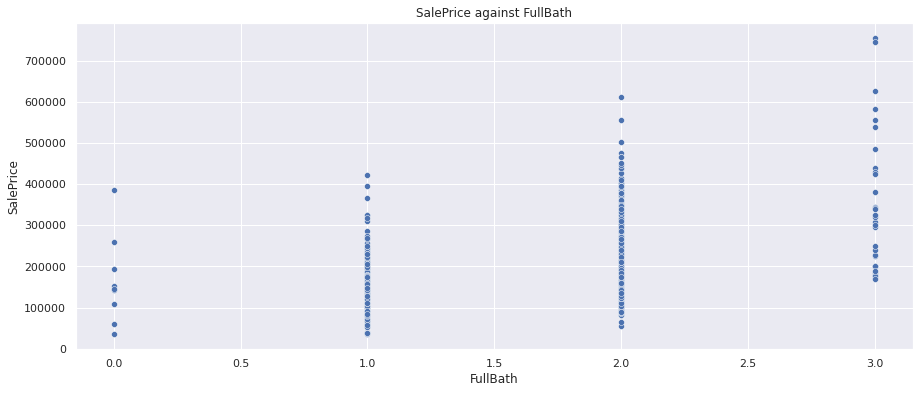

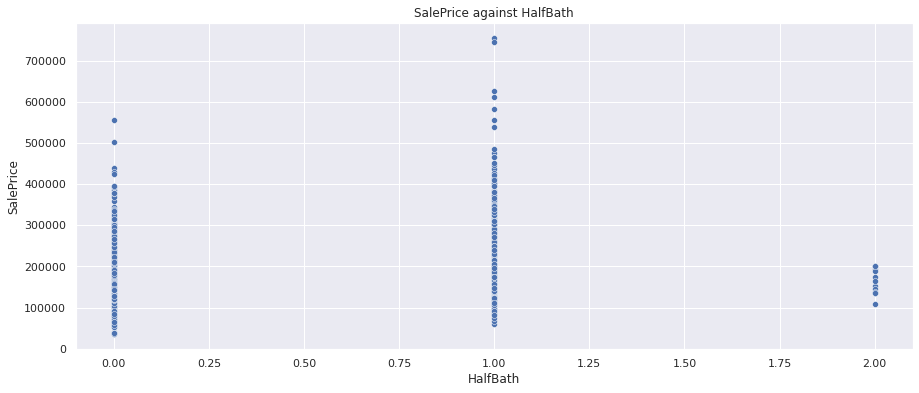

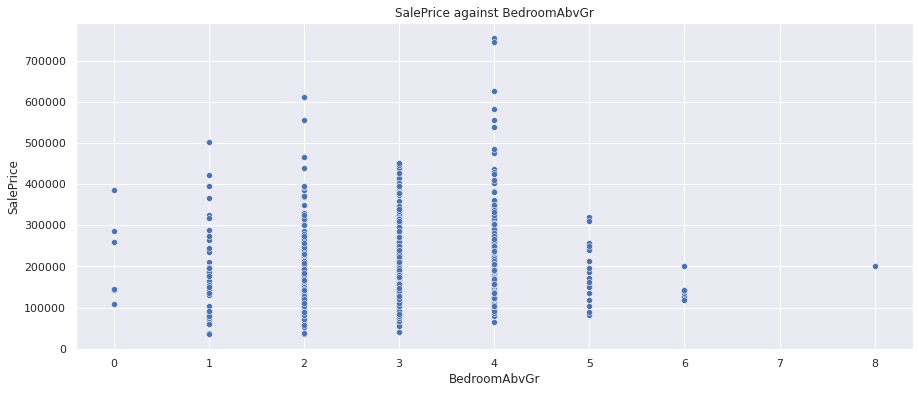

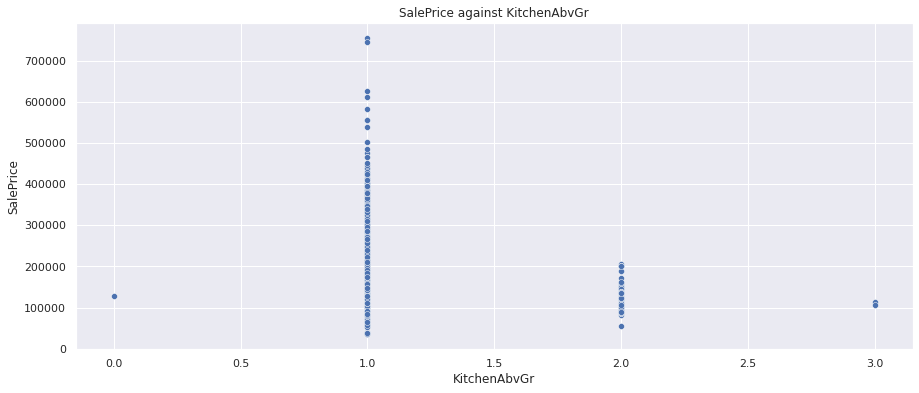

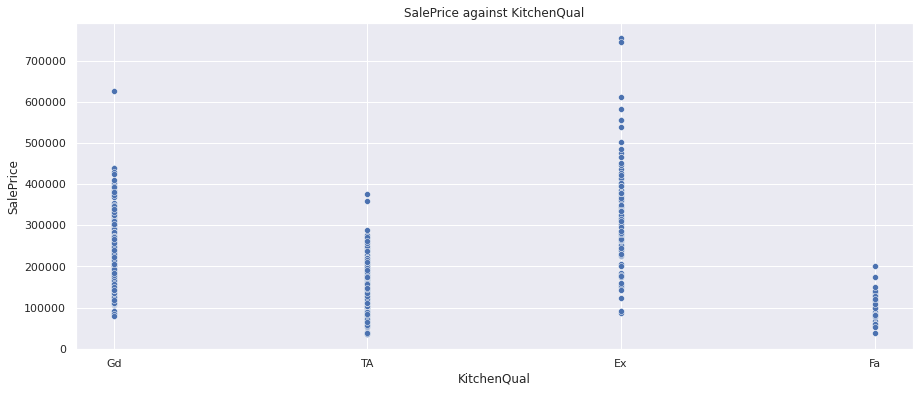

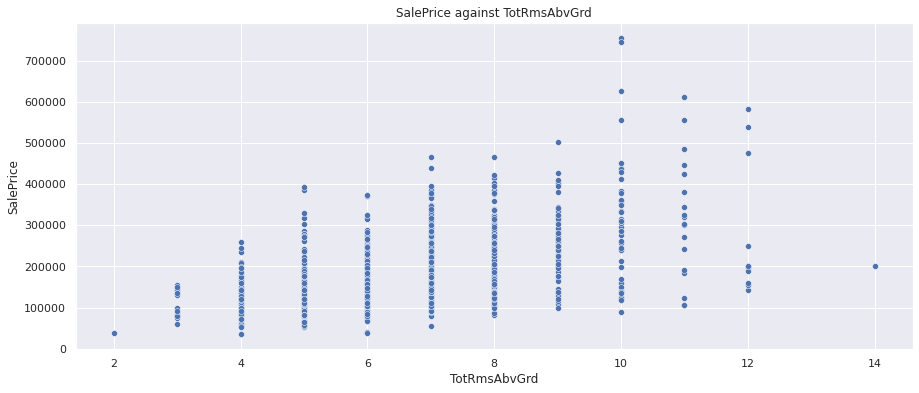

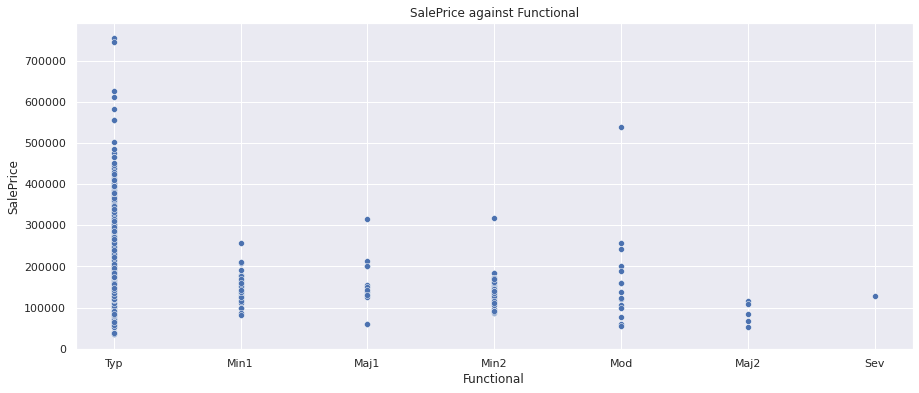

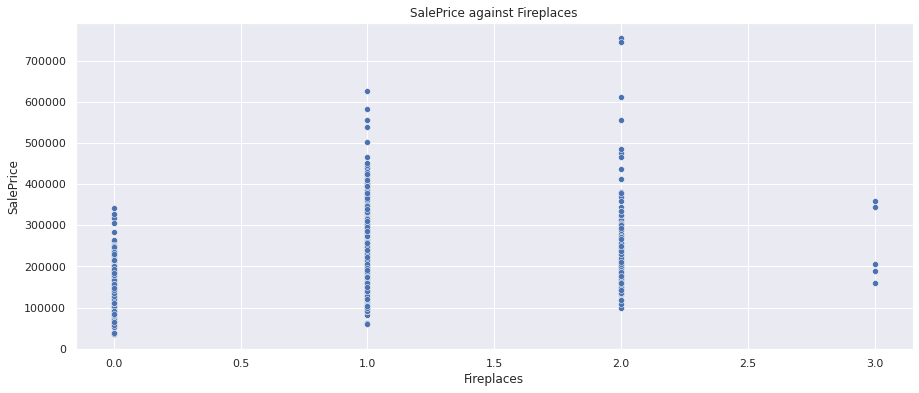

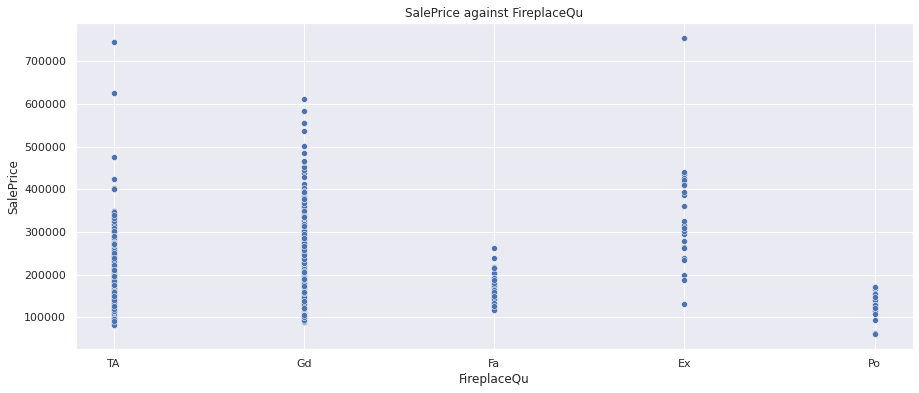

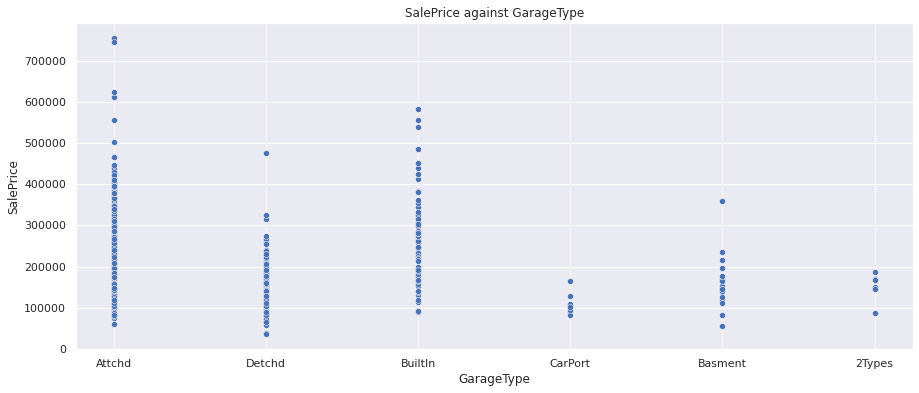

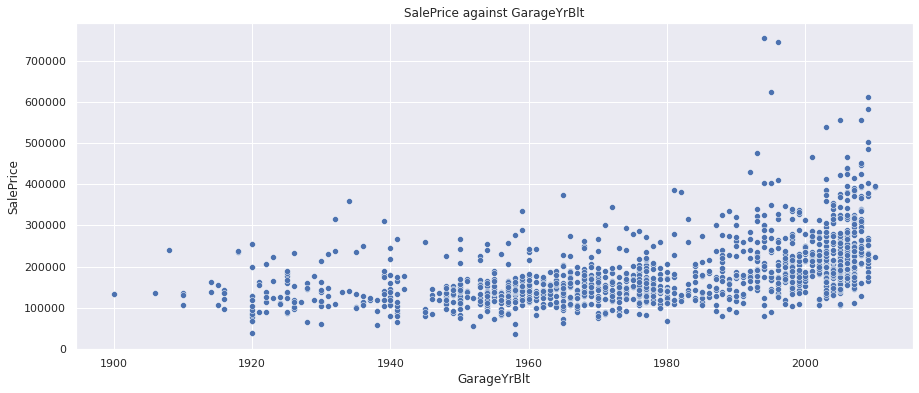

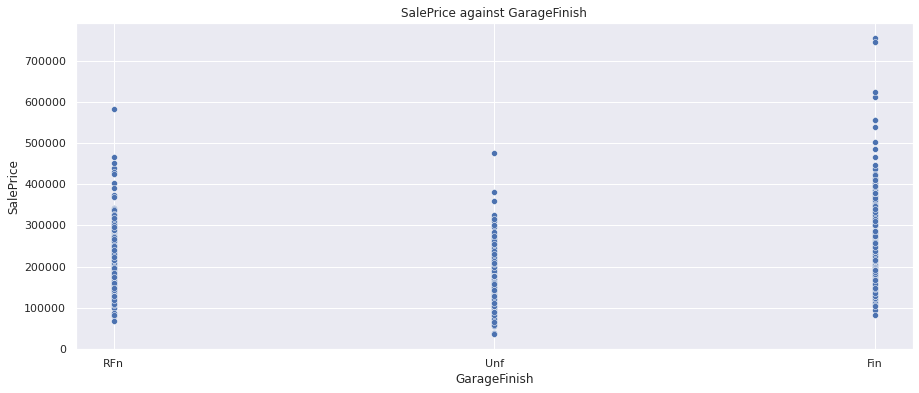

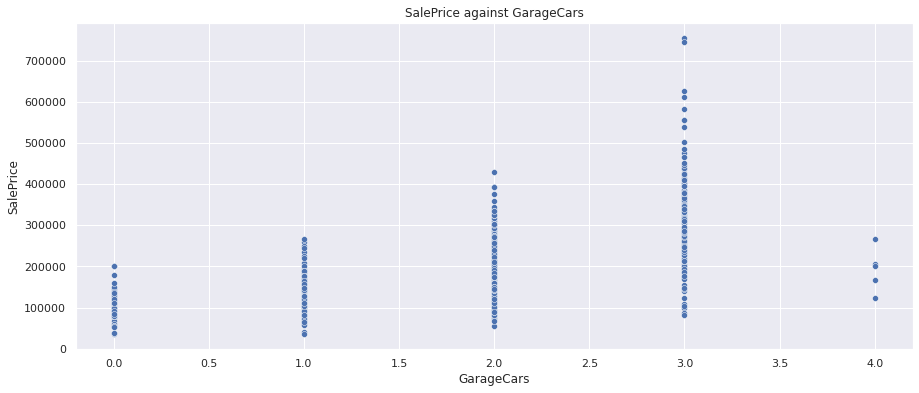

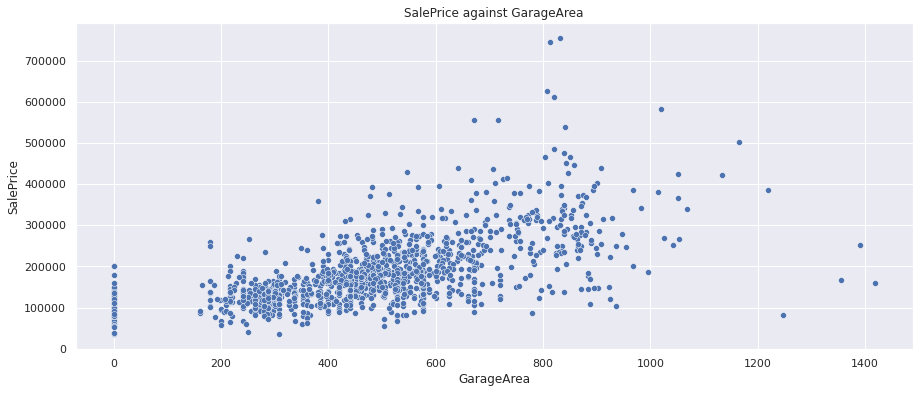

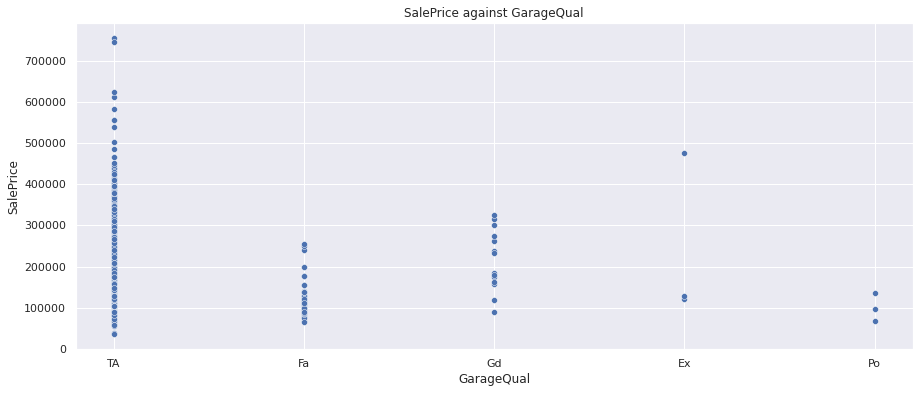

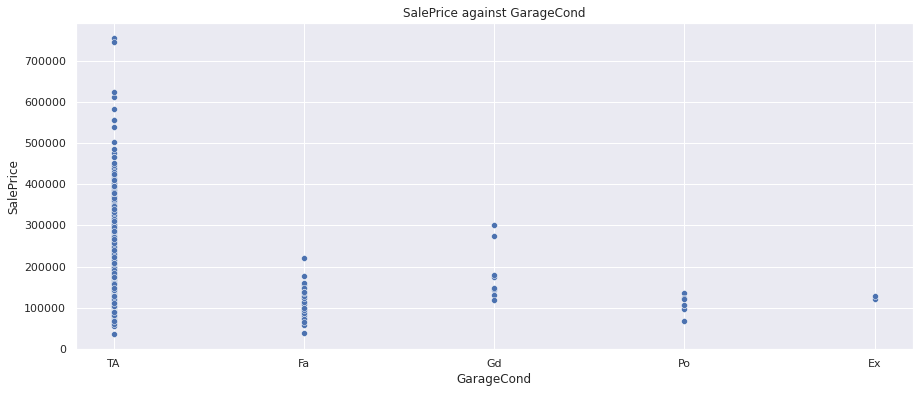

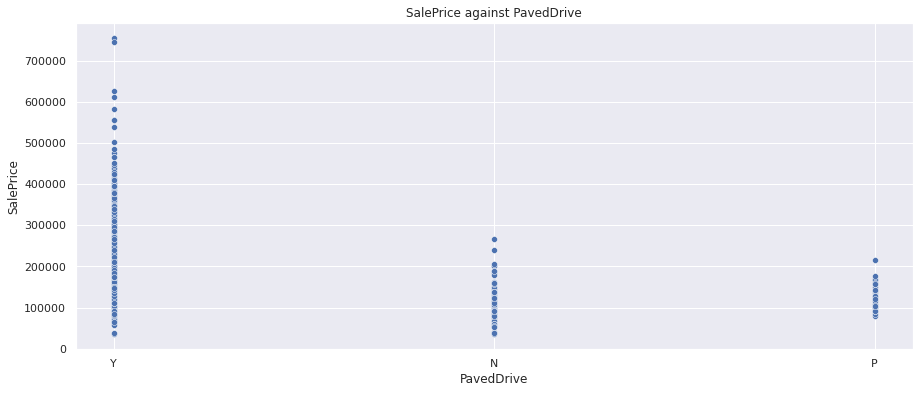

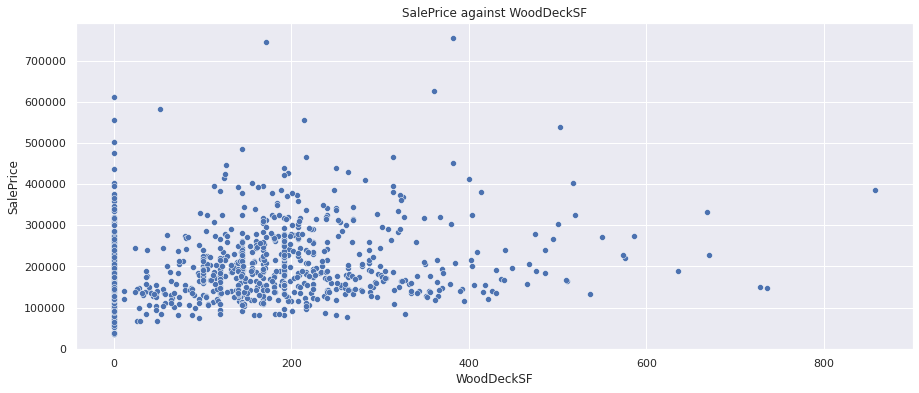

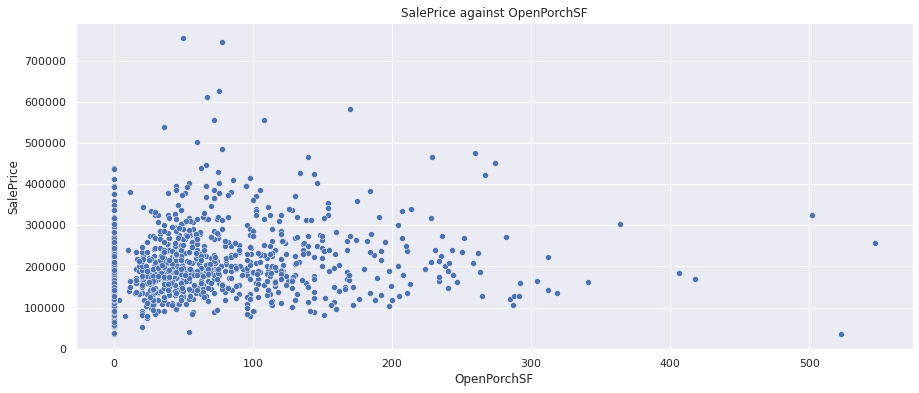

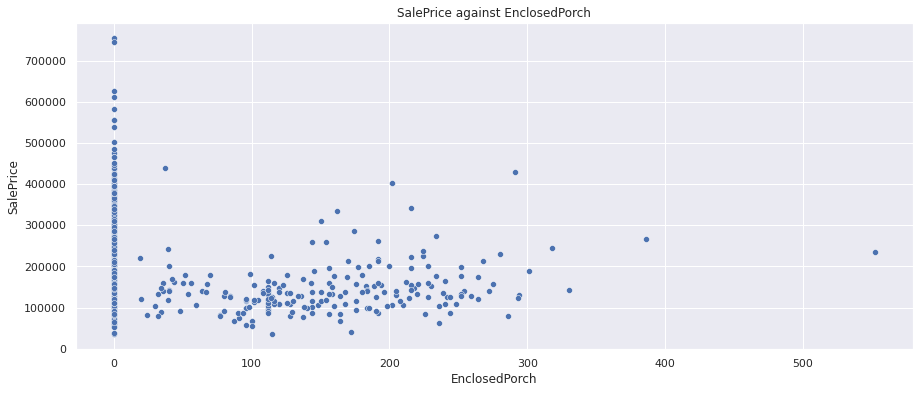

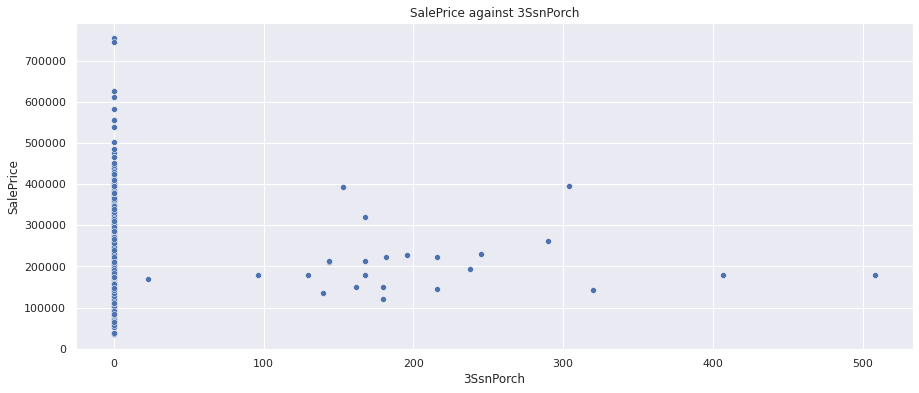

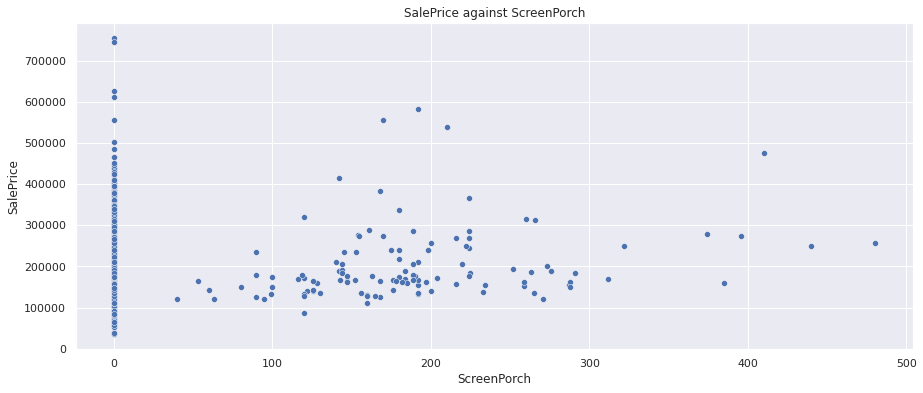

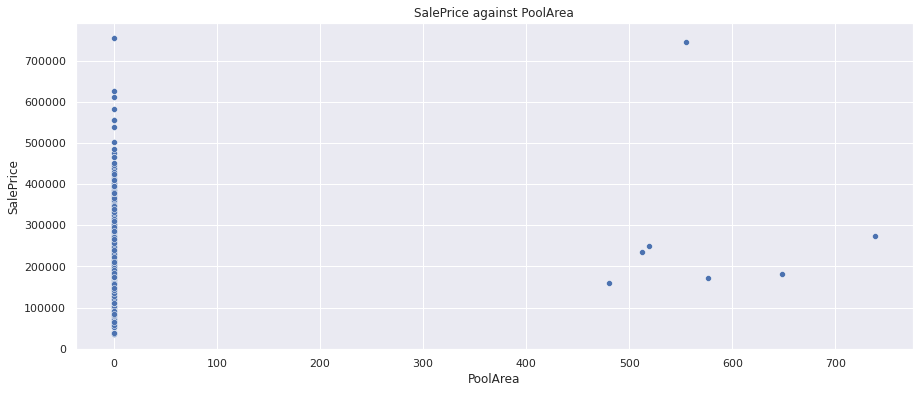

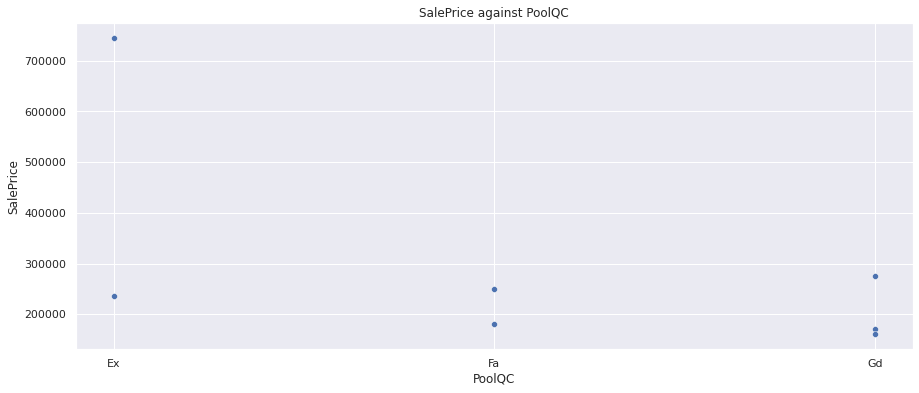

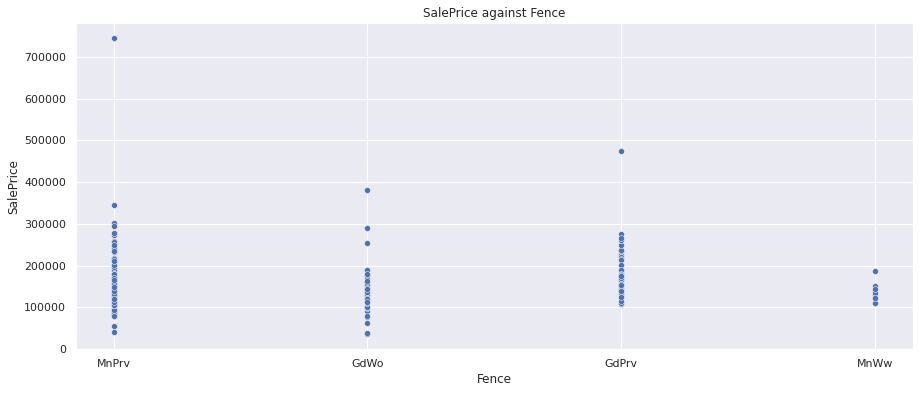

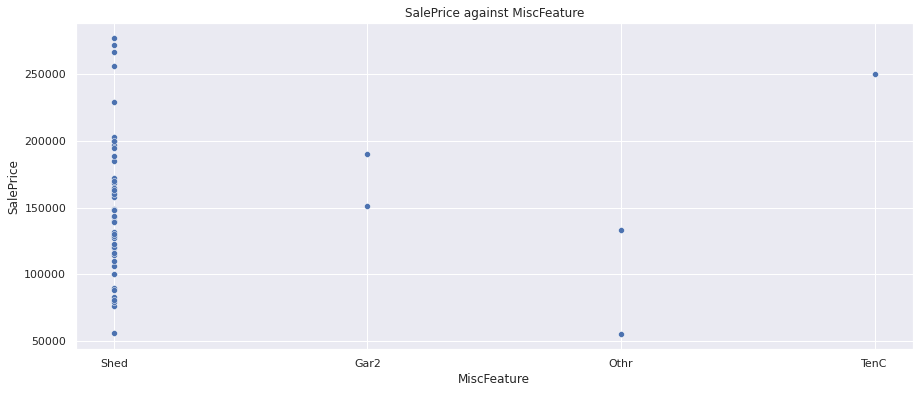

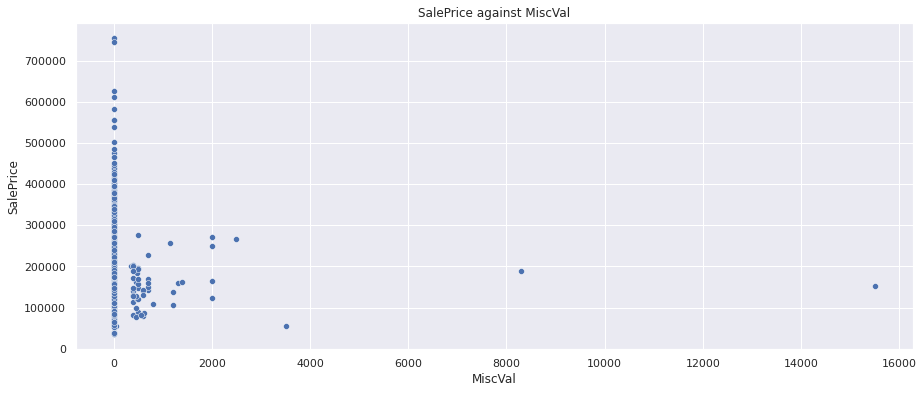

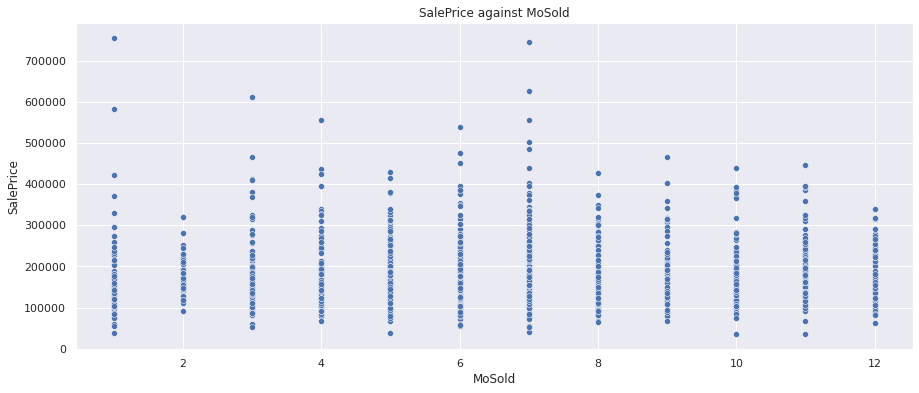

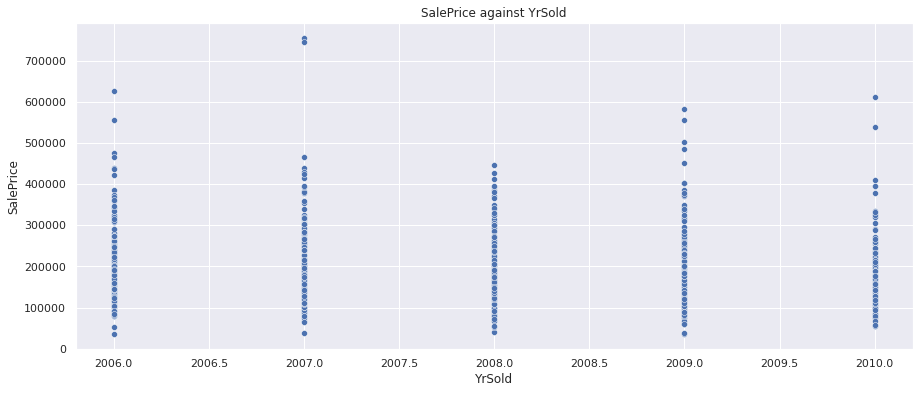

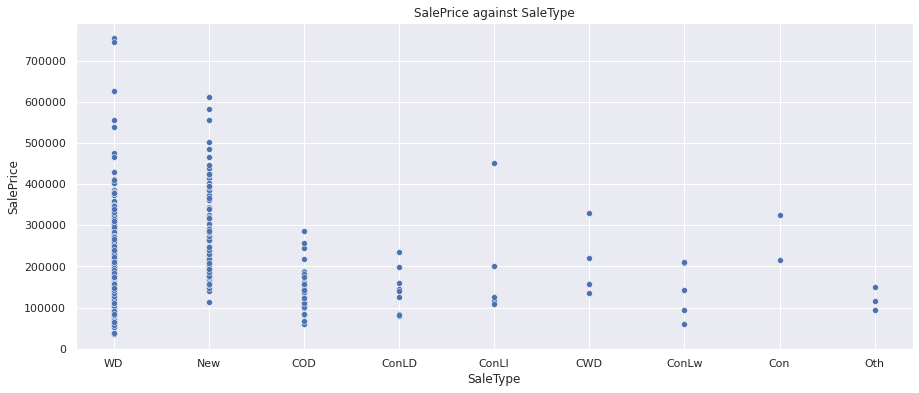

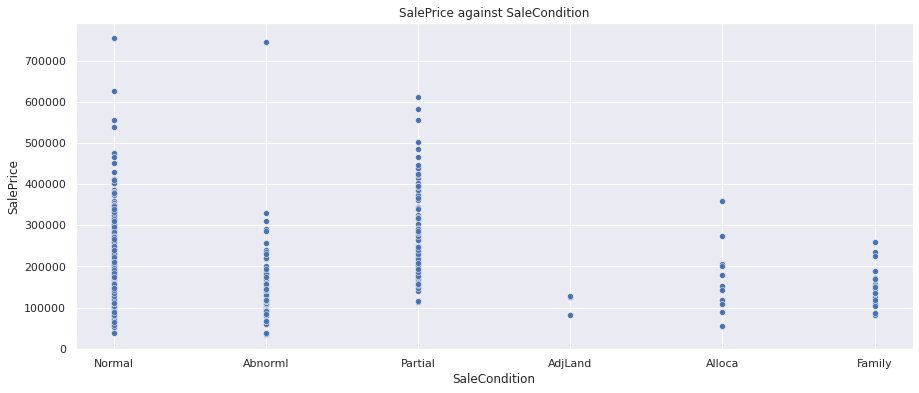

In [160]:
# Sacar todos para ver que variables tienen valores atipicos
# 

sns.set_theme()
for i in (X_train.columns):
    plt.figure(figsize=(15,6))
    sns.scatterplot(x=i,data=df_train,y=df_train['SalePrice'])
    plt.title('SalePrice against {}'.format(i))
    plt.show()

# Valores de SalePrice en train y test para ver su distribución

In [161]:
df_y_test['SalePrice']

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

In [162]:
xy_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [163]:
xy_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Text(0.5, 1.0, '(SalePrice) train-test comparison')

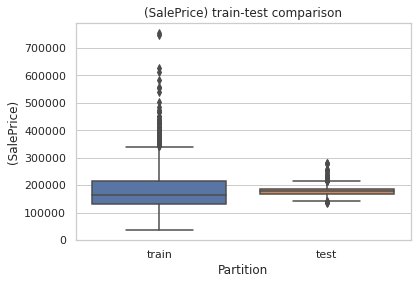

In [164]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=[xy_train['SalePrice'], df_y_test['SalePrice']])
ax.set_xlabel('Partition')
ax.set_xticklabels(["train", "test"])
ax.set_ylabel('(SalePrice)')
ax.set_title("(SalePrice) train-test comparison")

La distribución de probabilidad de las etiquetas de testeo es más concentrada que la de entrenamiento.


# Pasar variables object a numéricas

In [165]:
X_train.shape, xy_train.shape, X_test.shape, X_total.shape

((1460, 79), (1460, 80), (1459, 79), (2919, 79))

In [166]:
columns_object

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [180]:
# Entrenamiento para y cambio del tipo de variable con LabelEncoder

le=LabelEncoder()
for i in columns_object:
  X_train[i]=le.fit_transform(X_train[i])
  xy_train[i]=le.fit_transform(xy_train[i])
  X_test[i]=le.fit_transform(X_test[i])
  X_total[i]=le.fit_transform(X_total[i])

In [182]:
# Check para ver el tipo de variable y si tenemos nulos

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [183]:
xy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [184]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   int64  
 5   Alley          1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [185]:
X_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int64  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   Alley          2919 non-null   int64  
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   int64  
 8   Utilities      2919 non-null   int64  
 9   LotConfig      2919 non-null   int64  
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   int64  
 12  Condition1     2919 non-null   int64  
 13  Condition2     2919 non-null   int64  
 14  BldgType       2919 non-null   int64  
 15  HouseStyle     2919 non-null   int64  
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [186]:
label_object = {}


Ya tenemos todas las variables númericas en train (train y xytrain) , test y total


In [187]:
for item in label_object:
  print("{} encoding order: ".format(item), label_object[item].classes_)

In [188]:
label_object

{}

Comprobación de que no tenemos variables categóricas

In [189]:
X_test.select_dtypes(include=['object'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1459 rows x 0 columns]

In [190]:
X_train.select_dtypes(include=['object'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1460 rows x 0 columns]

In [191]:
xy_train.select_dtypes(include=['object'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1460 rows x 0 columns]

In [192]:
X_total.select_dtypes(include=['object'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2919 rows x 0 columns]

In [193]:
# Para retornar los valores de las categorías, deberiamos de ejecutar:
# label_object['Alley'].inverse_transform([0,1])

# Correlación con la variable SalesPrice, con todas las variables numéricas

Vuelvo a hacer la tabla de correlación con las variables sin null en x y con todas las variables numéricas

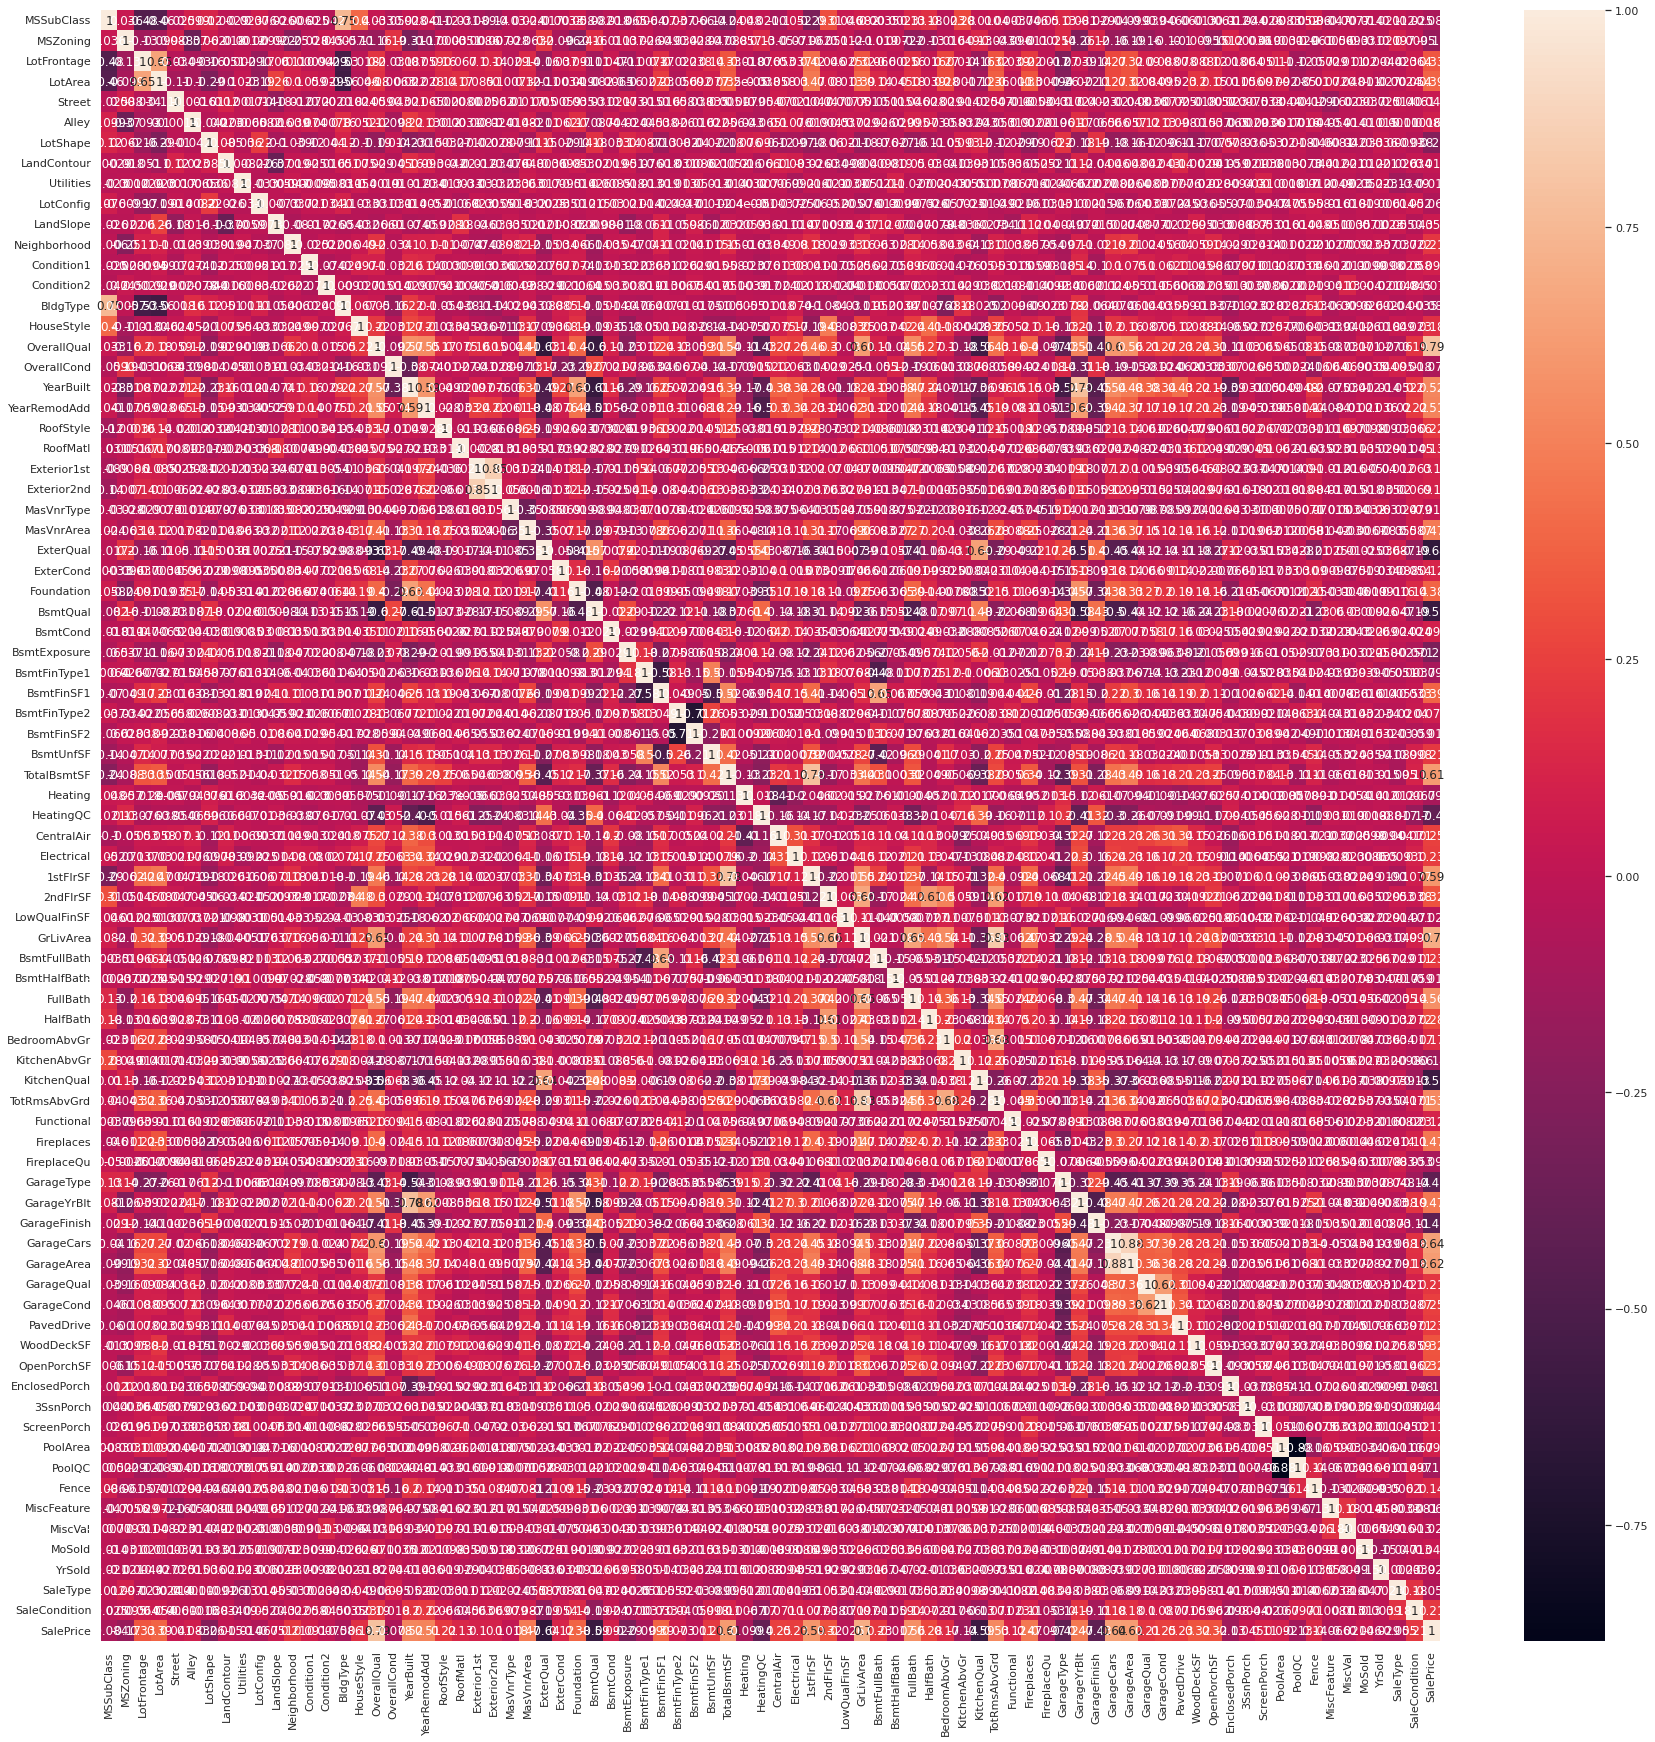

In [194]:
cor_train3=xy_train.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor_train3,annot=True)

In [195]:
correlation3=cor_train3["SalePrice"].sort_values(ascending=False)
correlation3=pd.DataFrame(correlation2)
correlation3.head(81)

SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907

# feature_80

In [200]:
def feature_selection(a,b,percent):
  x_top_columns=SelectPercentile(score_func = f_classif, percentile=percent)
  x_top_80=x_top_columns.fit_transform(a,b)
  
  # to return columns is still found
  X_train_top_80 = list(X_train.columns[x_top_columns.get_support()])
  
  X_train_feature = X_train[X_train.columns[X_train.columns.isin(X_train_top_80)]]
  X_test_feature = X_test[X_test.columns[X_test.columns.isin(X_train_top_80)]]
  return X_train_feature,X_test_feature

In [201]:
X_train_feature_80,X_test_feature_80 = feature_selection(X_train, y_train,80)

In [202]:
X_train.shape, y_train.shape

((1460, 79), (1460,))

In [203]:

X_train_feature_80.shape, X_test_feature_80.shape

((1460, 63), (1459, 63))

# Modelos

In [198]:
y_test_log10 = np.log10(df_y_test['SalePrice'])

## LinearRegression

In [204]:
model_lr_feature_selection_80=LinearRegression(normalize=True)
model_lr_feature_selection_80.fit(X_train_feature_80,y_train)

LinearRegression(normalize=True)

In [205]:
model_lr_feature_selection_80.score(X_train_feature_80,y_train)

0.8496034544191752

In [206]:
model_lr_feature_selection_80.score(X_test_feature_80,df_y_test['SalePrice'])

-2.43345628706436e+21

In [207]:
predictions=model_lr_feature_selection_80.predict(X_test_feature_80)

In [208]:

Y_pred_log10 = np.log10(predictions)

print("Test RMSE: ",round(mean_squared_error((y_test_log10),(Y_pred_log10), squared=False), 7))


Test RMSE:  0.3496952


##Modelo RandomForestRegressor  --> X_train, X_test --> Test RMSE:  0.1572024

In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

Y_pred = reg.predict(X_test)

Y_pred_log10 = np.log10(Y_pred)

print(reg.score(X_train,y_train))



print("Test RMSE: ",round(mean_squared_error((y_test_log10),(Y_pred_log10), squared=False), 7))


0.9807976754126868
Test RMSE:  0.1572024


##Modelo RandomForestRegressor --> X_train_feature_80, X_test_feature_80 --> Test RMSE:  0.1573988

In [209]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_feature_80, y_train)
Y_pred = reg.predict(X_test_feature_80)
print(reg.score(X_train_feature_80,y_train))

Y_pred_log10 = np.log10(Y_pred)

print("Test RMSE: ",round(mean_squared_error((y_test_log10),(Y_pred_log10), squared=False), 7))

0.980581904145381
Test RMSE:  0.1573988


Quitando el 20 % de las variables sacamos el mismo RMSE. **Descartamos analizar los modelos con X_test_feature_80**

## Multiples modelos

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [214]:
algorithms = {
    "lr": LinearRegression(),
    "random_forest":  RandomForestRegressor(random_state=42), # en Kaggle RMSE 0,12
    "svr": SVR(),
    "kr": KernelRidge(),
    "gbr": GradientBoostingRegressor(random_state=42),
    "brr": BayesianRidge(),
    "xgbr": XGBRegressor(),
    "knr": KNeighborsRegressor(n_jobs=-1),
    "Ridge": Ridge(alpha=1),
    "ridgecv": RidgeCV(alphas=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0)),
    "Lasso": Lasso(alpha=0.0008)   
}

In [215]:
# Defino un threshold (límite) muy alto para rmse
threshold = 1e6
# Quiero quedarme en una variable cuál es mejor modelo de todos
best_model = {
    "model": None,
    "regressor": None
}
# No está de más mantener un histórico
history = list()

# Recorro el diccionario algorithms
for key in algorithms:
  regressor = algorithms[key]
  regressor.fit(X_train, y_train)
  Y_pred = regressor.predict(X_test)
  Y_pred_log10 = np.log10(Y_pred)
  rmse = round(mean_squared_error(y_test_log10, Y_pred_log10, squared=False), 7)
  history.append([key, rmse])
  print([key, rmse])
  # Si el rmse obtenido es menor que el threshold actual, hemos mejorado performance 
  if rmse < threshold:
    # Actualizo threshold como mi nuevo benchmark
    threshold = rmse
    # Actualizo los valores del diccionario
    best_model['model'] = key
    best_model['regressor'] = regressor

['lr', 0.3756377]
['random_forest', 0.1572024]
['svr', 0.0554448]
['kr', 0.1718996]
['gbr', 0.1563029]
['brr', 0.1708059]
[17:01:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
['xgbr', 0.1646859]
['knr', 0.1479984]
['Ridge', 0.1718175]
['ridgecv', 0.1718175]
['Lasso', 0.1833881]


In [216]:
print(best_model)

{'model': 'svr', 'regressor': SVR()}


In [217]:
print(history)

[['lr', 0.3756377], ['random_forest', 0.1572024], ['svr', 0.0554448], ['kr', 0.1718996], ['gbr', 0.1563029], ['brr', 0.1708059], ['xgbr', 0.1646859], ['knr', 0.1479984], ['Ridge', 0.1718175], ['ridgecv', 0.1718175], ['Lasso', 0.1833881]]


In [220]:
  Y_pred = best_model["regressor"].predict(X_test)
  Y_pred_log10 = np.log10(Y_pred)

print("Best Test RMSE: ", 
      round(mean_squared_error((y_test_log10), Y_pred_log10, squared=False), 5),
      "for model {}.".format(best_model["model"]))

Best Test RMSE:  0.05544 for model svr.


In [221]:
y_pred_df = pd.DataFrame(Y_pred, columns=['SalePrice'], index=df_y_test.Id)
y_pred_df

SalePrice
Id                 
1461  162985.558599
1462  163016.925190
1463  163001.157925
1464  163001.097893
1465  163002.140772
...             ...
2915  162973.156580
2916  162976.918707
2917  163003.211313
2918  162977.670209
2919  163014.029414

[1459 rows x 1 columns]

In [222]:

y_pred_df.reset_index(inplace=True)
y_pred_df = y_pred_df.rename(columns = {'Id':'Id'})
y_pred_df

Id      SalePrice
0     1461  162985.558599
1     1462  163016.925190
2     1463  163001.157925
3     1464  163001.097893
4     1465  163002.140772
...    ...            ...
1454  2915  162973.156580
1455  2916  162976.918707
1456  2917  163003.211313
1457  2918  162977.670209
1458  2919  163014.029414

[1459 rows x 2 columns]

# Exportación a un CSV del resultado optimo

In [229]:
import datetime;
  
# ct stores current time
now = datetime.datetime.now()

In [230]:

y_pred_df.to_csv('/content/gdrive/MyDrive/Kaggle/houses_prices/prediction_{}.csv'.format(str(now)), index=False)

In [231]:
print('Media valor predicción ',
      round(np.mean(np.abs(y_pred_df['SalePrice'])), 2),
      'vs test ',
      round(np.mean(np.abs(df_y_test['SalePrice'])), 2))

print('Mediana valor predicción ',
      round(np.median(np.abs(y_pred_df['SalePrice'])), 2),
      'vs test ',
      round(np.median(np.abs(df_y_test['SalePrice'])), 2))

print('desviación típica valor predicción ',
      round(np.std(np.abs(y_pred_df['SalePrice'])), 2),
      'vs test ',
      round(np.std(np.abs(df_y_test['SalePrice'])), 2))

Media valor predicción  162998.08 vs test  179183.92
Mediana valor predicción  162995.63 vs test  179208.67
desviación típica valor predicción  21.04 vs test  16512.64
